### 1. Introduction

#### Problem statement:

https://www.kaggle.com/code/volodymyrgavrysh/bank-marketing-campaigns-dataset-analysis

**Objective**

The binary classification goal is to predict if the client will subscribe a bank term deposit (variable y).


***Data Description***

The dataset describes Portugal bank marketing campaigns results. The bank conducted campaigns were based mostly on direct phone calls, offering bank client to place a term deposit. If after all marketing afforts, client had agreed to place deposit - target variable was marked 'yes', otherwise 'no'. This dataset is public available for research. The details are described in S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014. This dataset is based on "Bank Marketing" UCI dataset (please check the description at: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing). The data is enriched by the addition of five new social and economic features/attributes (national wide indicators from a ~10M population country), published by the Banco de Portugal and publicly available at: https://www.bportugal.pt/estatisticasweb.

The detailed data dictionary is given below.

***Data Dictionary***

age (numeric) : age of client

job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

default: has credit in default? (categorical: "no","yes","unknown")

housing: has housing loan? (categorical: "no","yes","unknown")

loan: has personal loan? (categorical: "no","yes","unknown")

contact: contact communication type (categorical: "cellular","telephone")

month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")

day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")

duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model

campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

previous: number of contacts performed before this campaign and for this client (numeric)

poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

emp.var.rate: employment variation rate - quarterly indicator (numeric)

cons.price.idx: consumer price index - monthly indicator (numeric)

cons.conf.idx: consumer confidence index - monthly indicator (numeric)

euribor3m: euribor 3 month rate - daily indicator (numeric)

nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target): y - has the client subscribed a term deposit? (binary: "yes","no")

### 2. Import relevant libraries

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.linear_model import LogisticRegression

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

### 3. Reading Dataset

In [2]:
# Import dataset
df = pd.read_csv("bank-additional-full.csv", sep=';')

In [3]:
# Create a copy 
bank = df.copy()

### 4. Dataset Characteristics

In [4]:
# dataset sample to get a feel for the rows and columns
bank.sample(15, random_state=2)  # setting the random_state to get the same results every time

age            job   marital            education  default housing  \
5485    49     technician   married             basic.9y       no     yes   
4390    56        retired   married          high.school  unknown      no   
38408   70        retired   married          high.school       no     yes   
9975    40    blue-collar   married             basic.4y  unknown      no   
5331    39    blue-collar   married             basic.9y       no     yes   
12224   48   entrepreneur   married             basic.6y       no     yes   
18562   58  self-employed  divorced    university.degree       no     yes   
29327   34     management  divorced  professional.course       no     yes   
32186   35    blue-collar   married             basic.9y  unknown     yes   
15195   24     technician    single             basic.6y       no     yes   
19248   32     technician    single  professional.course       no     yes   
3735    28     technician    single  professional.course       no      no   
34680   30    blue-collar    single             basic.9y       no      no   
37397   26        student    single             basic.9y       no     yes   
14079   27     technician   married  professional.course       no     yes   

      loan    contact month day_of_week  duration  campaign  pdays  previous  \
5485    no  telephone   may         mon       146         6    999         0   
4390    no  telephone   may         tue        88         2    999         0   
38408   no   cellular   oct         wed        72         3    999         0   
9975    no  telephone   jun         wed       105         3    999         0   
5331    no  telephone   may         fri        83         2    999         0   
12224   no  telephone   jul         thu       202         1    999         0   
18562   no   cellular   jul         thu       548         1    999         0   
29327   no   cellular   apr         fri       140         2    999         0   
32186  yes   cellular   may         fri       153         1    999         1   
15195   no  telephone   jul         thu      1448         7    999         0   
19248  yes   cellular   aug         wed       952         1    999         0   
3735    no  telephone   may         fri       323         2    999         0   
34680   no   cellular   may         thu       362         6    999         0   
37397   no   cellular   aug         wed       582         1    999         0   
14079  yes   cellular   jul         mon       324         2    999         0   

          poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
5485   nonexistent           1.1          93.994          -36.4      4.857   
4390   nonexistent           1.1          93.994          -36.4      4.856   
38408  nonexistent          -3.4          92.431          -26.9      0.735   
9975   nonexistent           1.4          94.465          -41.8      4.959   
5331   nonexistent           1.1          93.994          -36.4      4.857   
12224  nonexistent           1.4          93.918          -42.7      4.966   
18562  nonexistent           1.4          93.918          -42.7      4.968   
29327  nonexistent          -1.8          93.075          -47.1      1.405   
32186      failure          -1.8          92.893          -46.2      1.313   
15195  nonexistent           1.4          93.918          -42.7      4.958   
19248  nonexistent           1.4          93.444          -36.1      4.967   
3735   nonexistent           1.1          93.994          -36.4      4.859   
34680  nonexistent          -1.8          92.893          -46.2      1.266   
37397  nonexistent          -2.9          92.201          -31.4      0.879   
14079  nonexistent           1.4          93.918          -42.7      4.962   

       nr.employed    y  
5485        5191.0   no  
4390        5191.0   no  
38408       5017.5   no  
9975        5228.1   no  
5331        5191.0   no  
12224       5228.1   no  
18562       5228.1   no  
29327       5099.1   no  
32186     

In [5]:
# Shape of the data
print(f"There are {bank.shape[0]} rows and {bank.shape[1]} columns")  

There are 41188 rows and 21 columns


In [6]:
# Data type of columns
bank.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [7]:
# number of non-null values in dataset
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
# null values in the dataset
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

*Observations*:

- This is a clean dataset with no null values

In [9]:
# convert objects to cotegorical features
bank["job"] = bank.job.astype("category")
bank["marital"] = bank.marital.astype("category")
bank["education"] = bank.education.astype("category")
bank["default"] = bank.default.astype("category")
bank["housing"] = bank.housing.astype("category")
bank["loan"] = bank.loan.astype("category")
bank["contact"] = bank.contact.astype("category")
bank["month"] = bank.month.astype("category")
bank["day_of_week"] = bank.day_of_week.astype("category")
bank["poutcome"] = bank.poutcome.astype("category")
bank["y"] = bank.y.astype("category")

In [10]:
# basic statistics for each column (incl. mean, median, quartiles, min, max)
bank.describe(include="all").T

count unique                top   freq         mean  \
age             41188.0    NaN                NaN    NaN     40.02406   
job               41188     12             admin.  10422          NaN   
marital           41188      4            married  24928          NaN   
education         41188      8  university.degree  12168          NaN   
default           41188      3                 no  32588          NaN   
housing           41188      3                yes  21576          NaN   
loan              41188      3                 no  33950          NaN   
contact           41188      2           cellular  26144          NaN   
month             41188     10                may  13769          NaN   
day_of_week       41188      5                thu   8623          NaN   
duration        41188.0    NaN                NaN    NaN    258.28501   
campaign        41188.0    NaN                NaN    NaN     2.567593   
pdays           41188.0    NaN                NaN    NaN   962.475454   
previous        41188.0    NaN                NaN    NaN     0.172963   
poutcome          41188      3        nonexistent  35563          NaN   
emp.var.rate    41188.0    NaN                NaN    NaN     0.081886   
cons.price.idx  41188.0    NaN                NaN    NaN    93.575664   
cons.conf.idx   41188.0    NaN                NaN    NaN     -40.5026   
euribor3m       41188.0    NaN                NaN    NaN     3.621291   
nr.employed     41188.0    NaN                NaN    NaN  5167.035911   
y                 41188      2                 no  36548          NaN   

                       std     min     25%     50%     75%     max  
age               10.42125    17.0    32.0    38.0    47.0    98.0  
job                    NaN     NaN     NaN     NaN     NaN     NaN  
marital                NaN     NaN     NaN     NaN     NaN     NaN  
education              NaN     NaN     NaN     NaN     NaN     NaN  
default                NaN     NaN     NaN     NaN     NaN     NaN  
housing                NaN     NaN     NaN     NaN     NaN     NaN  
loan                   NaN     NaN     NaN     NaN     NaN     NaN  
contact                NaN     NaN     NaN     NaN     NaN     NaN  
month                  NaN     NaN     NaN     NaN     NaN     NaN  
day_of_week            NaN     NaN     NaN     NaN     NaN     NaN  
duration        259.279249     0.0   102.0   180.0   319.0  4918.0  
campaign          2.770014     1.0     1.0     2.0     3.0    56.0  
pdays           186.910907     0.0   999.0   999.0   999.0   999.0  
previous          0.494901     0.0     0.0     0.0     0.0     7.0  
poutcome               NaN     NaN     NaN     NaN     NaN     NaN  
emp.var.rate       1.57096    -3.4    -1.8     1.1     1.4     1.4  
cons.price.idx     0.57884  92.201  93.075  93.749  93.994  94.767  
cons.conf.idx     4.628198   -50.8   -42.7   -41.8   -36.4   -26.9  
euribor3m         1.734447   0.634   1.344   4.857   4.961   5.045  
nr.employed      72.251528  4963.6  5099.1  5191.0  5228.1  5228.1  
y                      NaN     NaN     NaN     NaN     NaN     NaN

*Observations*:

* We can see that the median age of 38 is lower than the mean age of ~40 and the max age is farther from the median than the mean indicating a somewhat skewed distribution 
* ~25% of the jobs are *admin*
* Over 60% of the client population is married
* About 30% of the client population has a university degree
* Around 79% of the clients do not have any defaults in credit
* 52% of the clients have a housing loan
* 82% of the clients do not have a personal loan
* 63% of the clients were contacted by cellular phone
* A third of the clients were contacted in the month of May
* Around 21% of the clients were contacted on Thursday
* The mean duration of contact is higher than the median duration indicating a righ skew with a long tail as the max vaue of duration is high at 4918
* The average number of contacts is higher than the median number of contacts with a high max value indicating a right skewed distribution
* Majority of the clients were not contacted earlier as highlighted by the value of 999 for *pdays*
* With a median value of 0 for *previous*, we observe that most of the clients were no contacted previously
* There isn't a lot of insight from the distributions of employment variance rate, consumer price index and consumer confidence index, the euribor 3 month rate, and the number of employees 
* Finally, ~88% of the clients did not subscribe a bank term deposit


### 5. Exploratory Data Analysis

In [11]:
# plotting a boxplot and histogram on same scale 

def hist_box(data, feature, figsize=(14, 8), kde=False, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,) 
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="pink")  
    sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter") if bins else sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)  # For histogram
    ax_hist2.axvline(data[feature].mean(), color="red", linestyle="--")  # Add mean to the histogram
    ax_hist2.axvline(data[feature].median(), color="green", linestyle="-")  # Add median to the histogram

In [12]:
# create labeled barplots 
def lab_bar(data, feature, perc=False, n=None):
    total = len(data[feature])  
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))
    plt.xticks(rotation=90, fontsize=20)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )
    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  
        else:
            label = p.get_height() 
        x = p.get_x() + p.get_width() / 2  
        y = p.get_height()  
        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=14,
            xytext=(0, 5),
            textcoords="offset points",
        )  
    plt.show() 

#### Univariate Data Analysis

##### Numerical Columns

In [13]:
col_num = bank.select_dtypes(include=[np.number]).columns.tolist()

age
duration
campaign
pdays
previous
emp.var.rate
cons.price.idx
cons.conf.idx
euribor3m
nr.employed


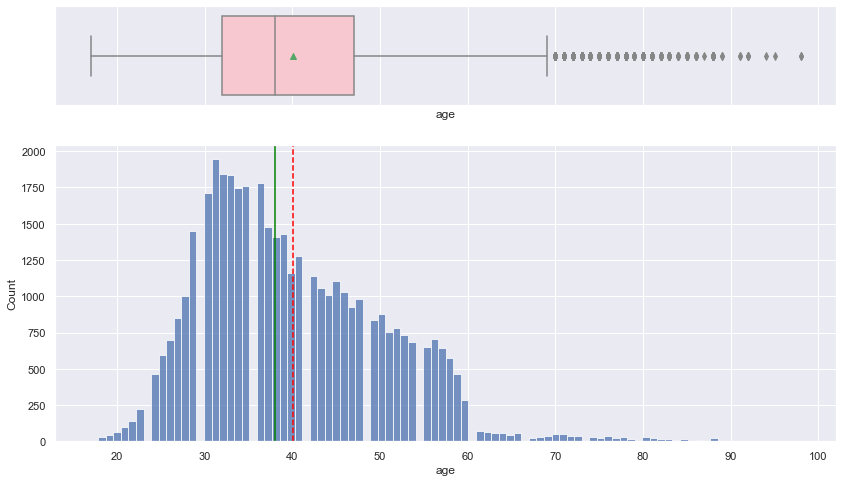

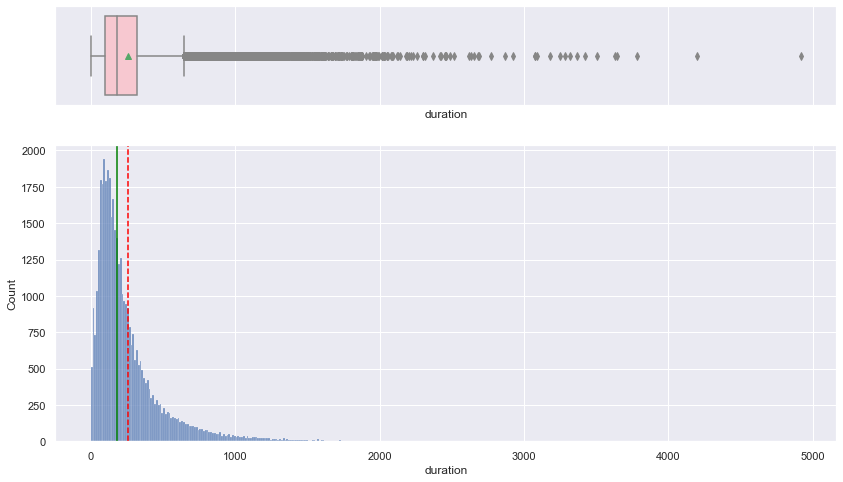

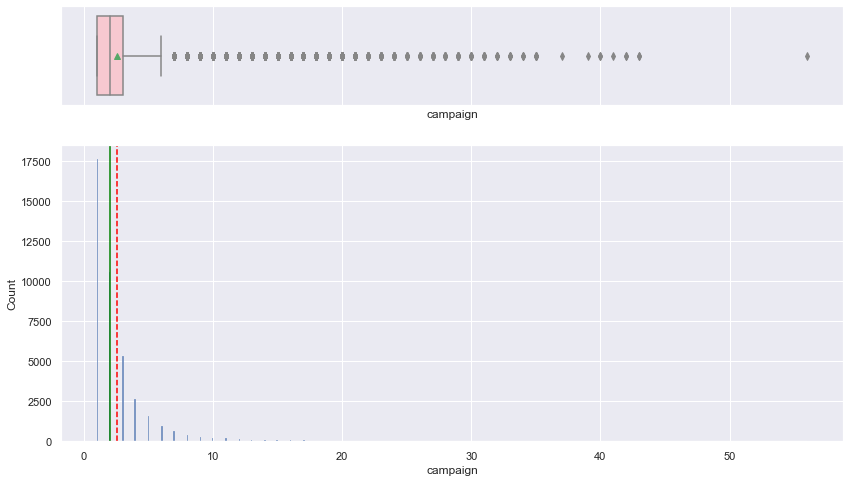

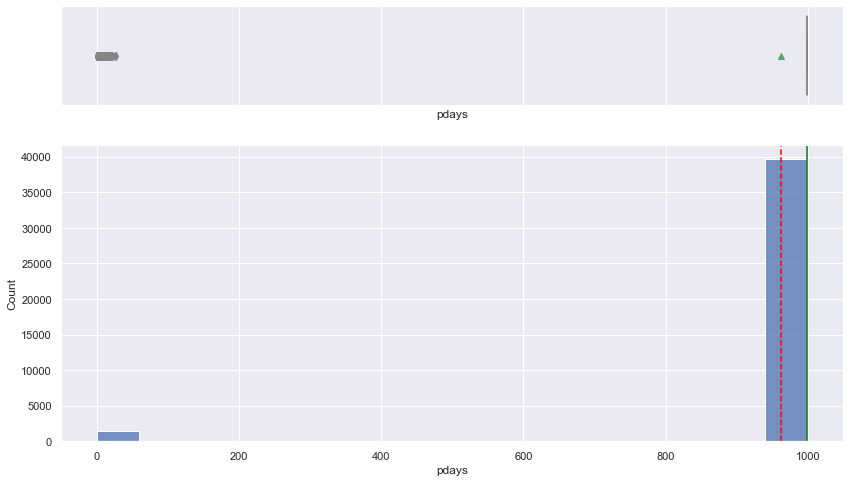

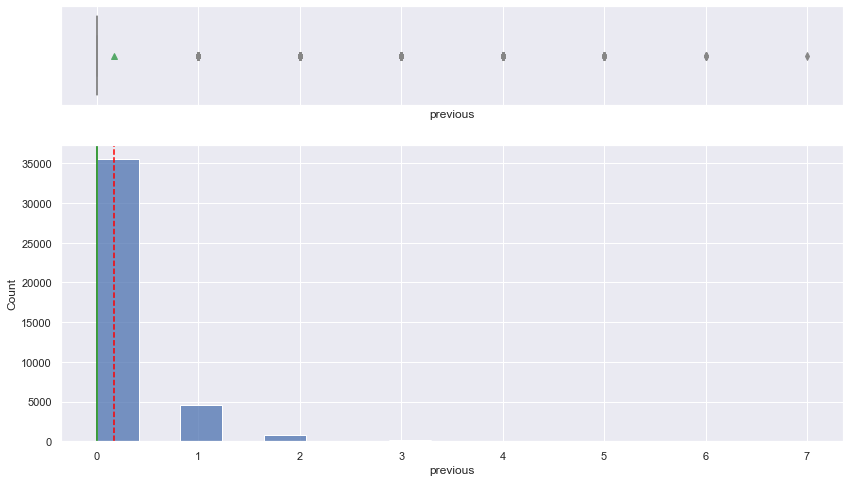

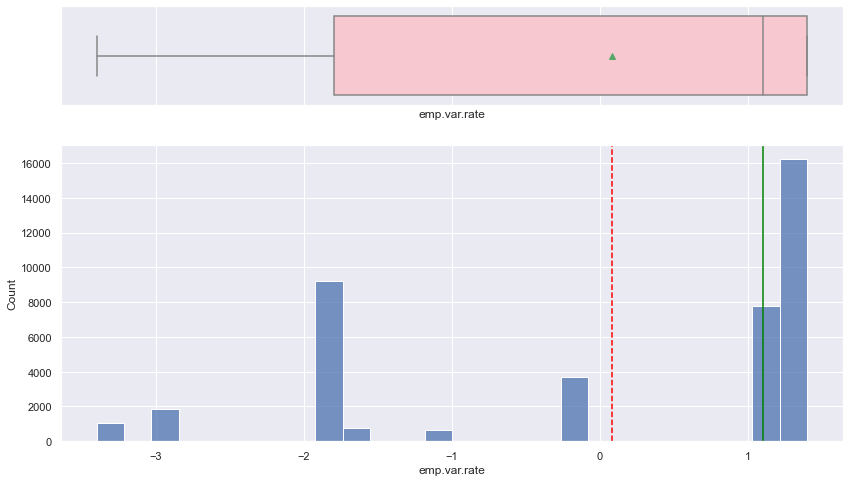

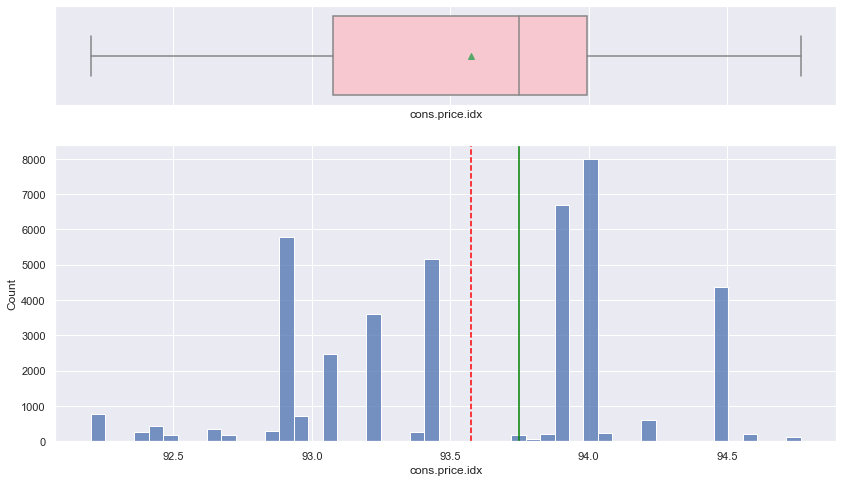

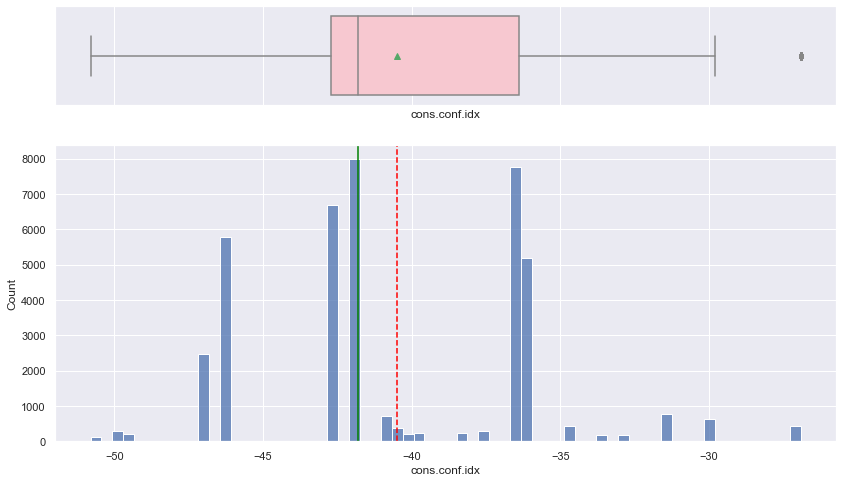

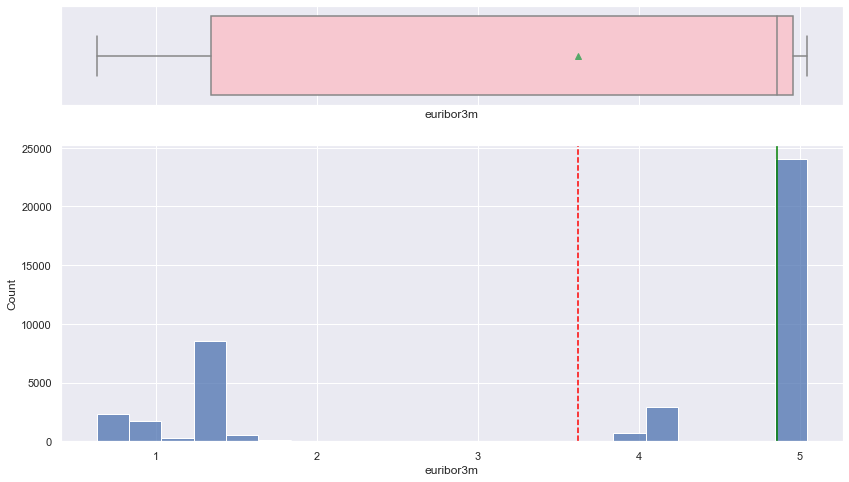

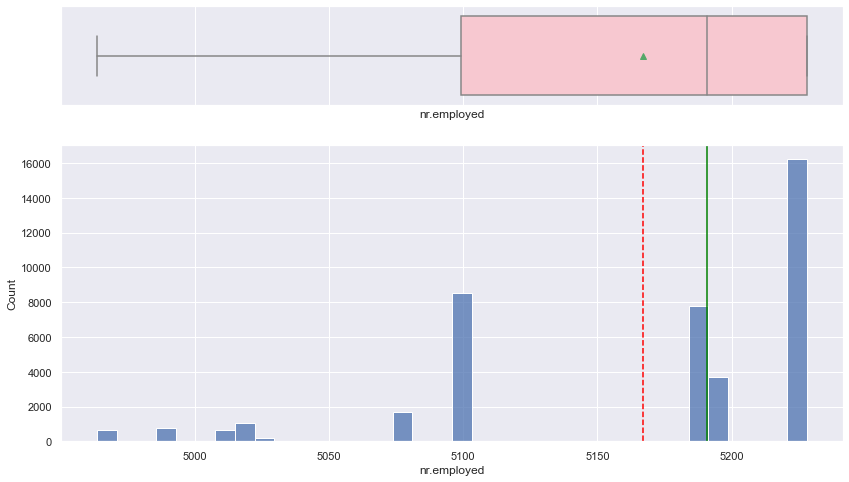

In [14]:
for col in col_num:
    hist_box(bank, col)
    print(col)

* `Age` has a right skew with several outliers and a long tail
* `Duration` also has a right skew with several outliers and a long tail
* `Campaign` - most clients were contacted under 10 times in this campaign
* `pdays` - most clients were not contacted prior to this campaign
* `emp.var.rate`, `euribor3m`, `nr.employed` have a left skew 

##### Categorical Columns

In [15]:
col_obj = bank.select_dtypes(exclude=[np.number]).columns.tolist()

job


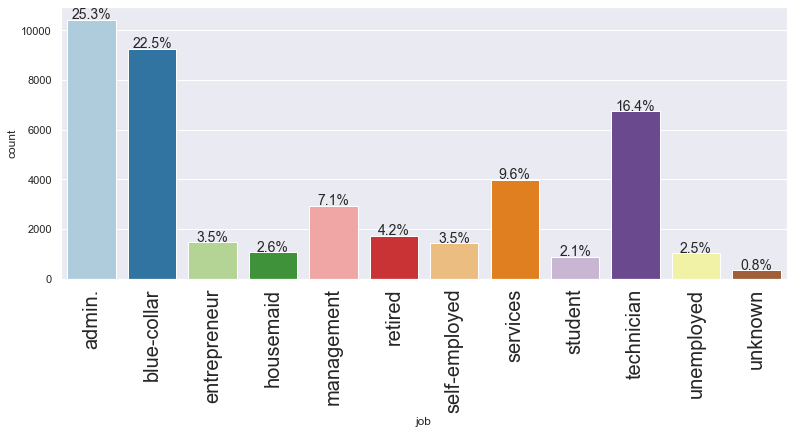

marital


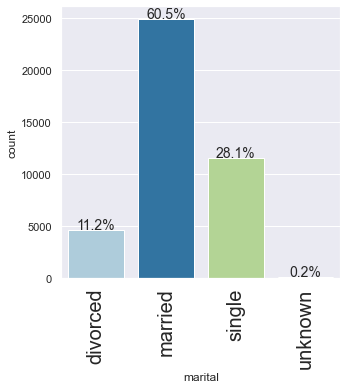

education


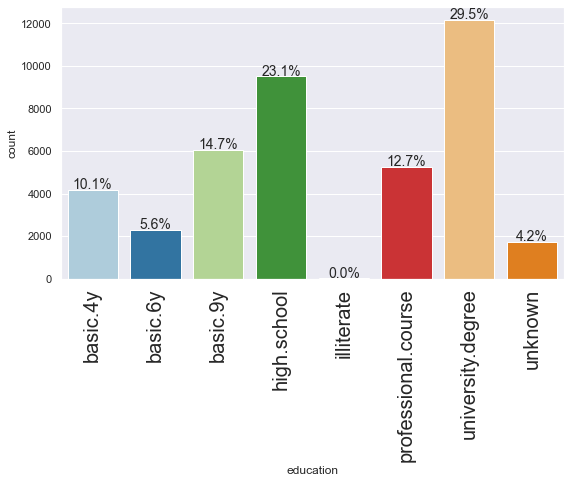

default


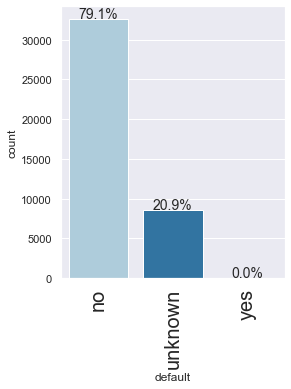

housing


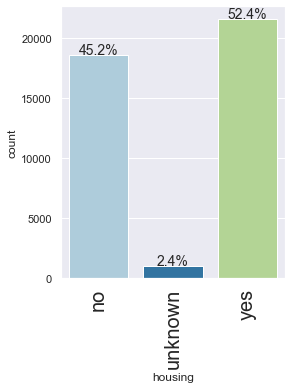

loan


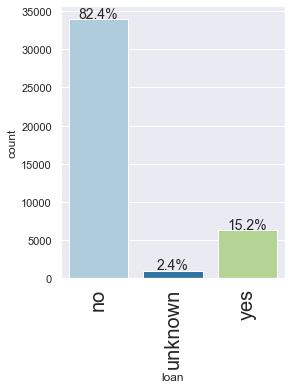

contact


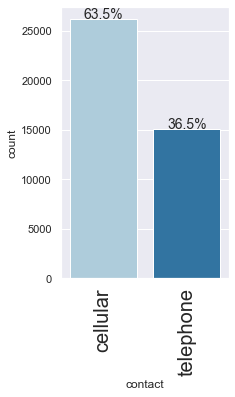

month


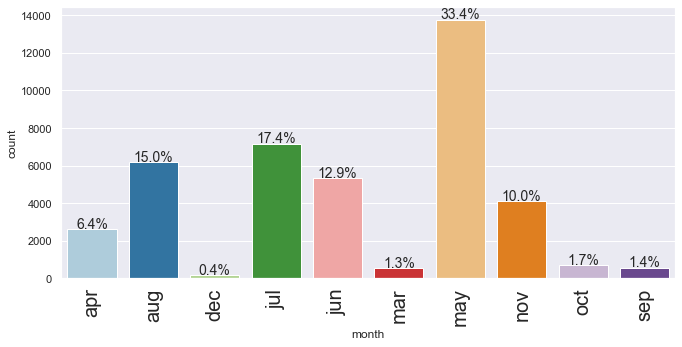

day_of_week


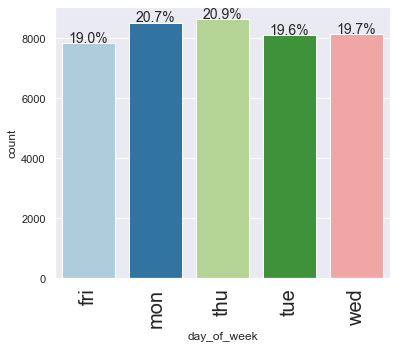

poutcome


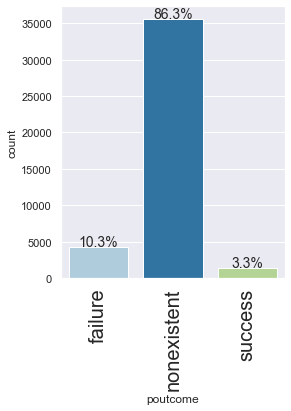

y


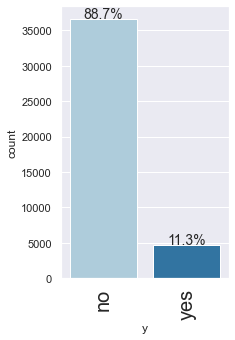

In [16]:
for col in col_obj:
    print(col)
    lab_bar(bank, col, perc=True)

* Admin, blue-collar and technician jobs account for over 50% of the jobs
* Majority (60%) of the clients are married
* Close to 30% of the clients had a university degree followed by clients with a high school degree (23%)
* Around 80% of the clients had no prior default while the remaining 20% clients' status was unknown
* Over half of the clients had a housing loan
* Over 80% of the clients did not have a personal loan
* Most of the clients (over 63%) were contacted by cellular phone
* About a third of the contacts occured in May followed by July and August
* The days of the week when the client is contact was balanced across all days of week. Mon and Thu had slightly higher contacts
* Most of the clients (~86%) had not been contacted before
* Around 89% of the clients did not subscribe to a term deposit

In [17]:
for i in col_obj:
    print("Unique values in", i, "are :")
    print(bank[i].value_counts())
    print("*" * 50)

Unique values in job are :
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
**************************************************
Unique values in marital are :
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
**************************************************
Unique values in education are :
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
**************************************************
Unique values in default are :
no         32588
unknown     8597
yes            3
Name: defaul

#### Bivariate Data Analysis

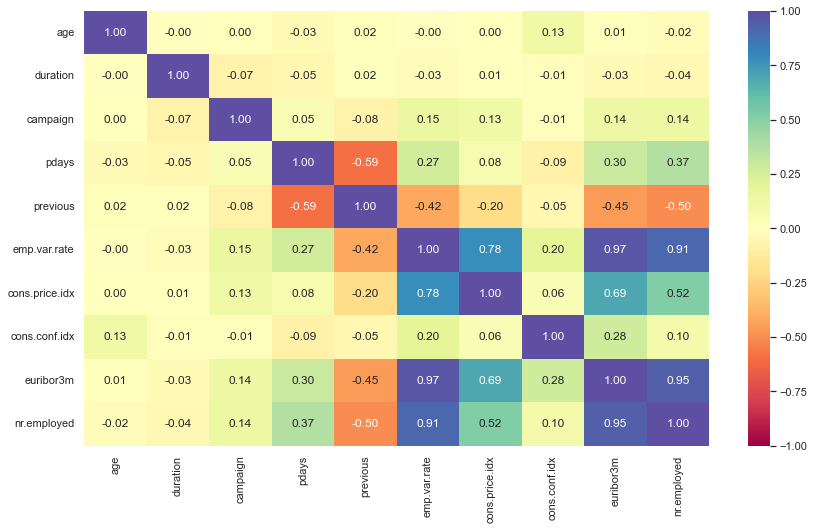

In [18]:
plt.figure(figsize=(14, 8))
sns.heatmap(bank.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* `emp.var.rate` has a strong correlation with `cons.price.idx`, `euribor3m`, `nr.employed`
* `euribor3m` and `nr.employed` are strongly correlated
* Based on these correlations, we decided to drop `emp.var.rate`, `euribor3m`

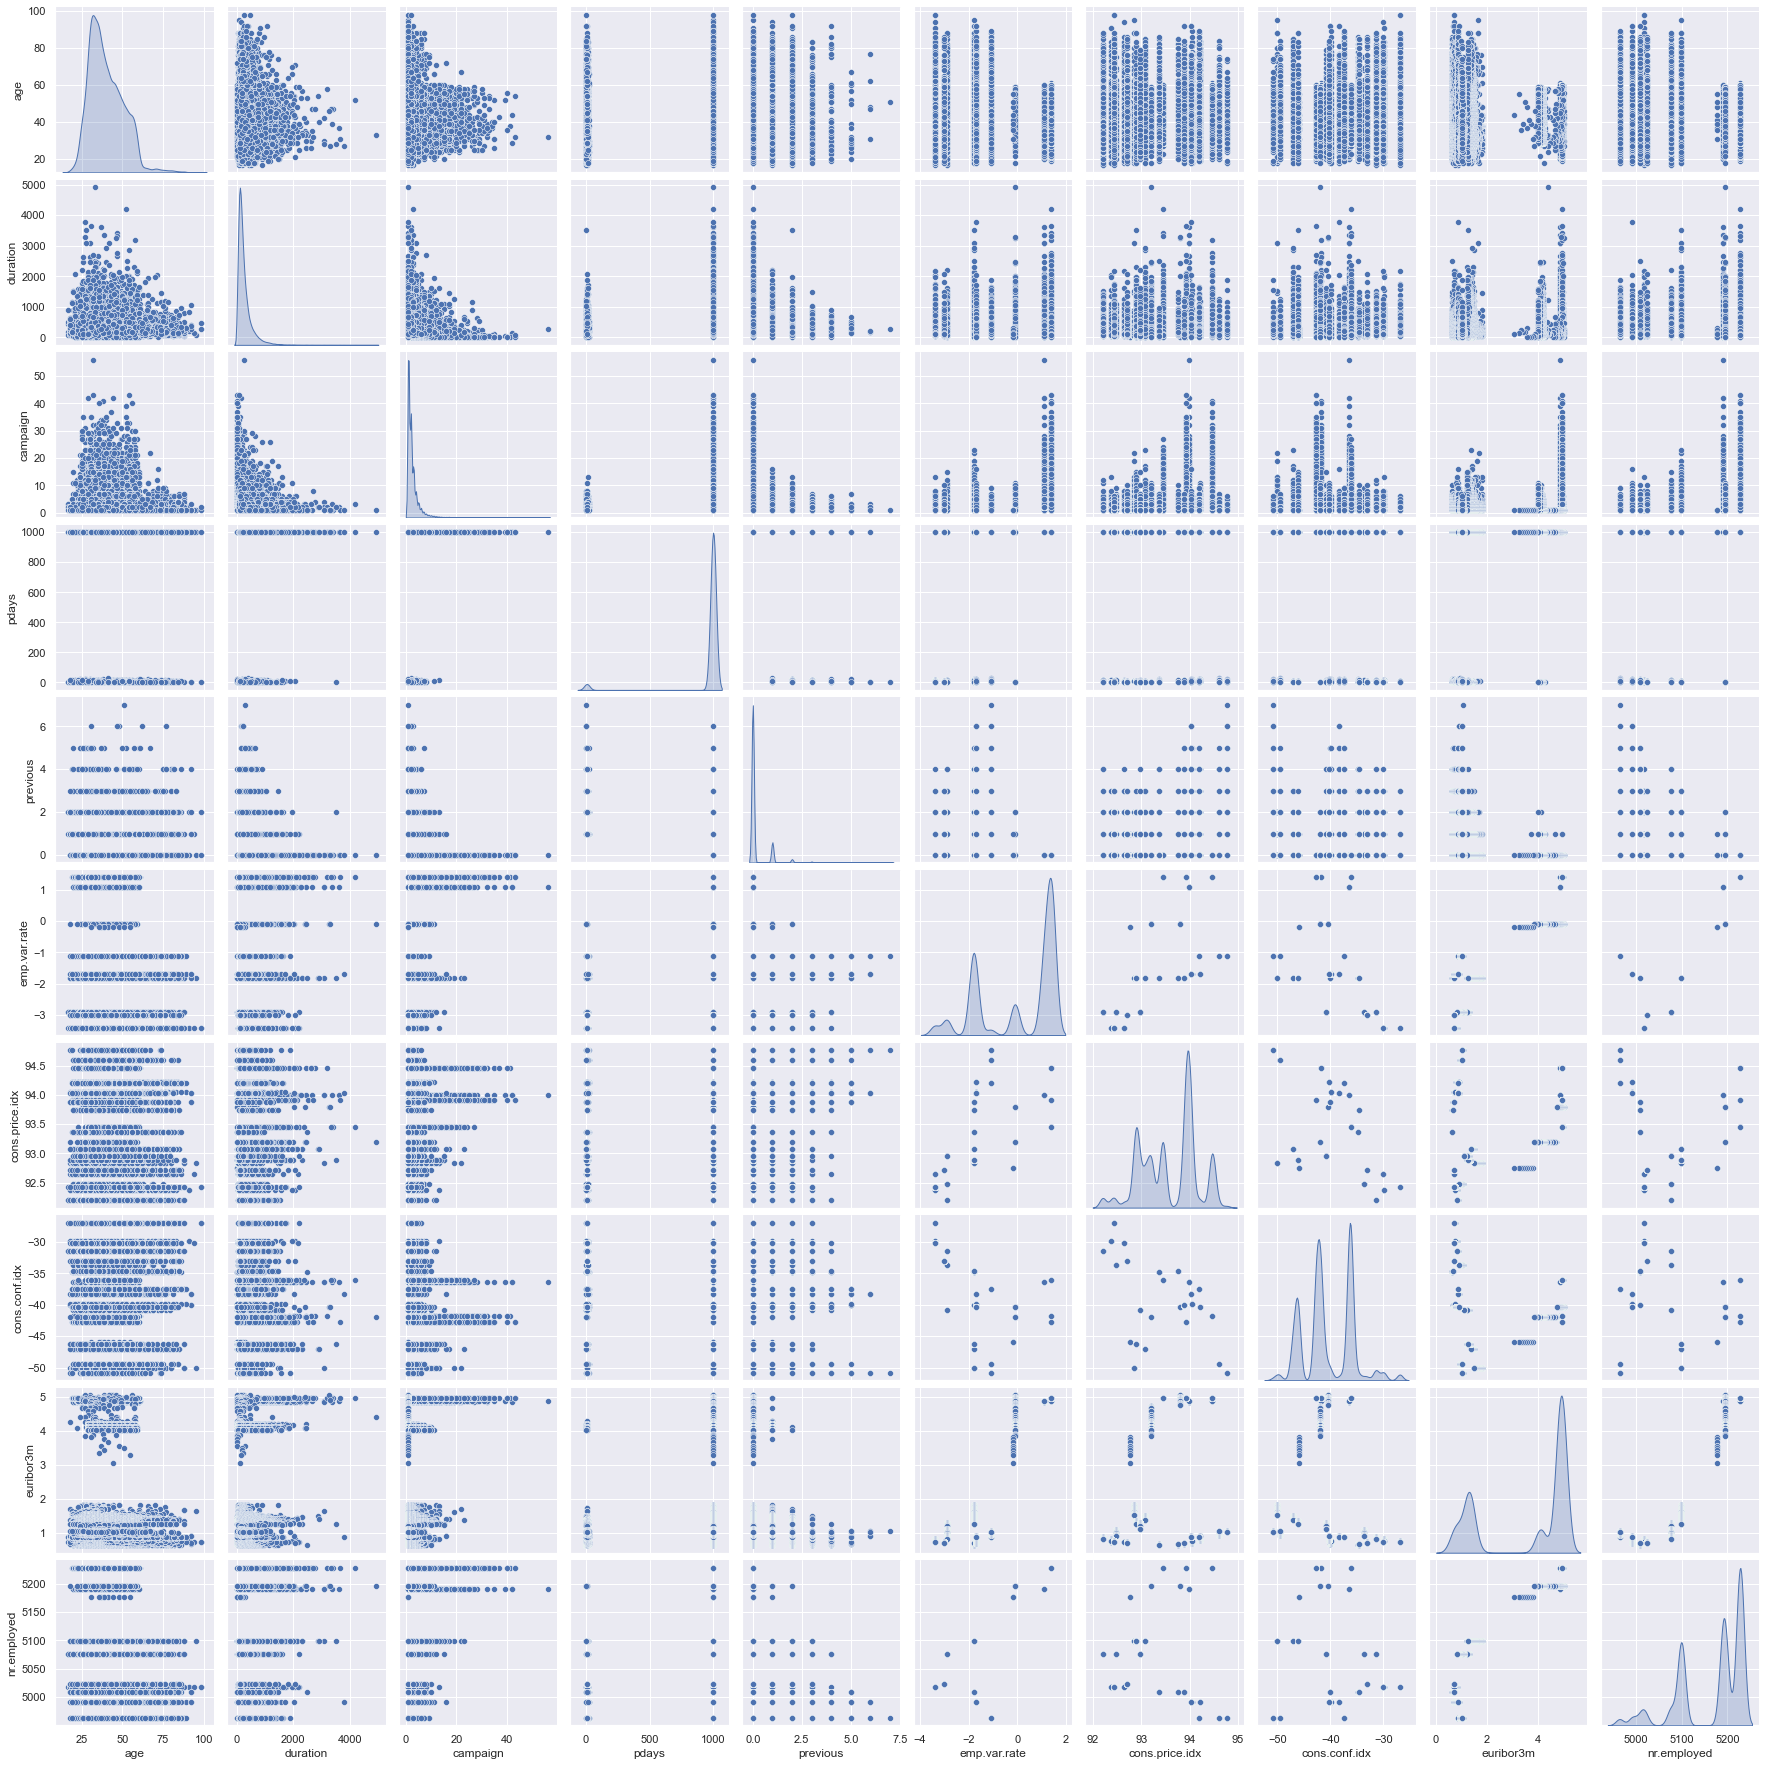

In [19]:
# Correlation between dataset numerical features
sns.pairplot(bank, diag_kind="kde")

In [20]:
### function to plot distributions wrt target

def distribution_plot_wrt_target(data, predictor, target):
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    target_uniq = data[target].unique()
    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )
    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )
    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )
    plt.tight_layout()
    plt.show()

age


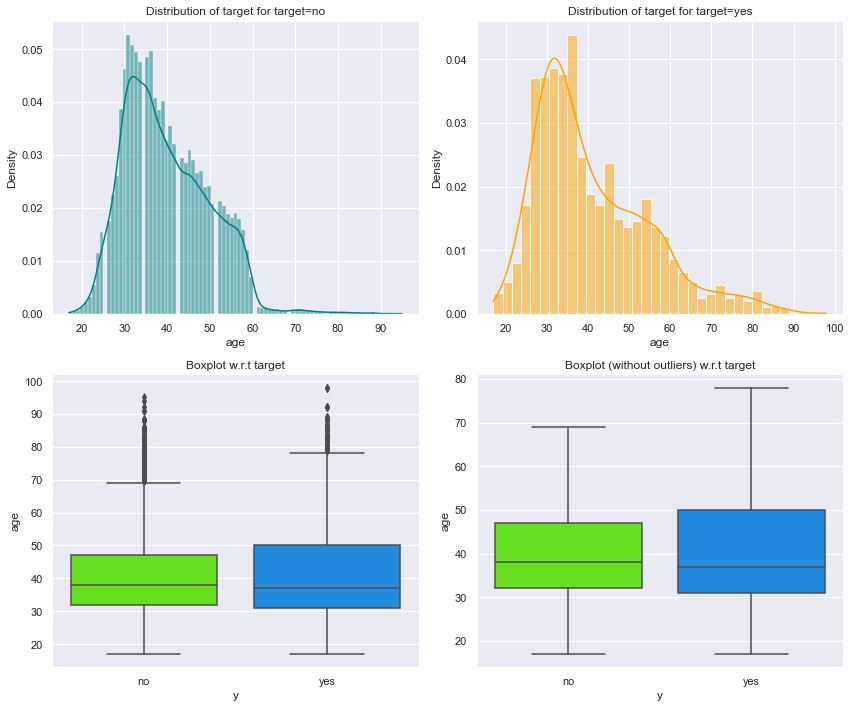

duration


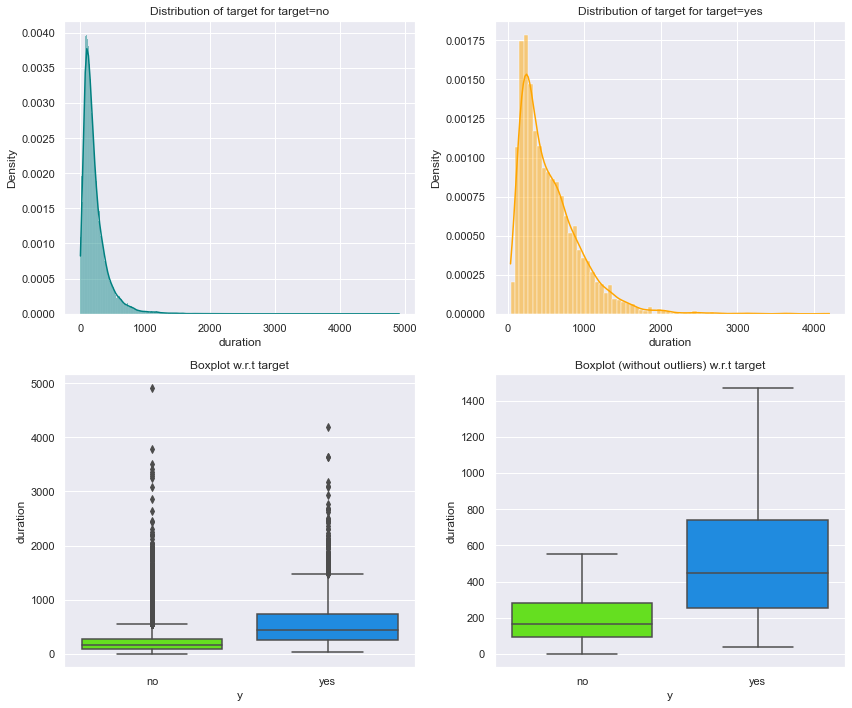

campaign


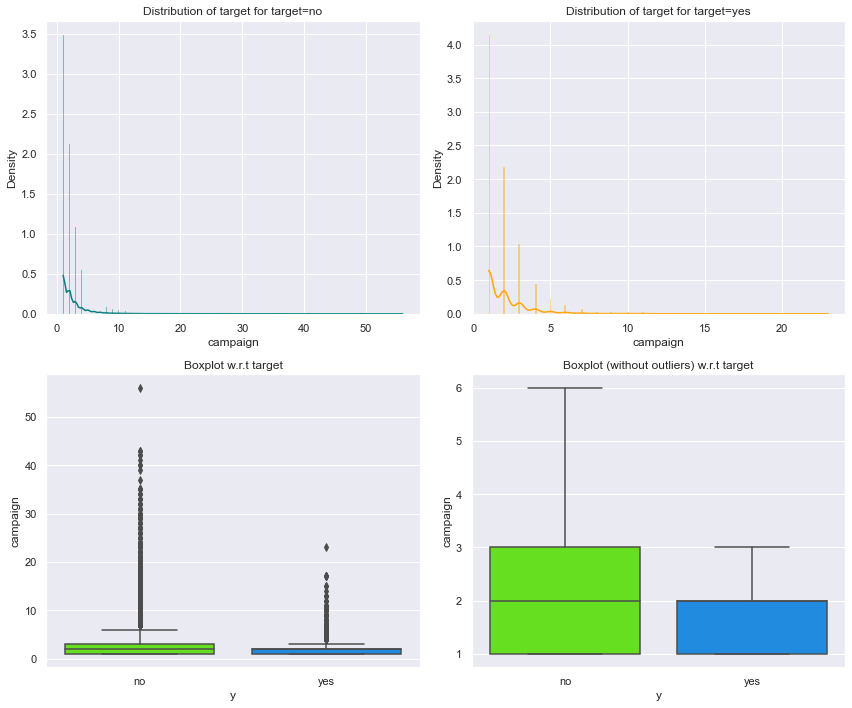

pdays


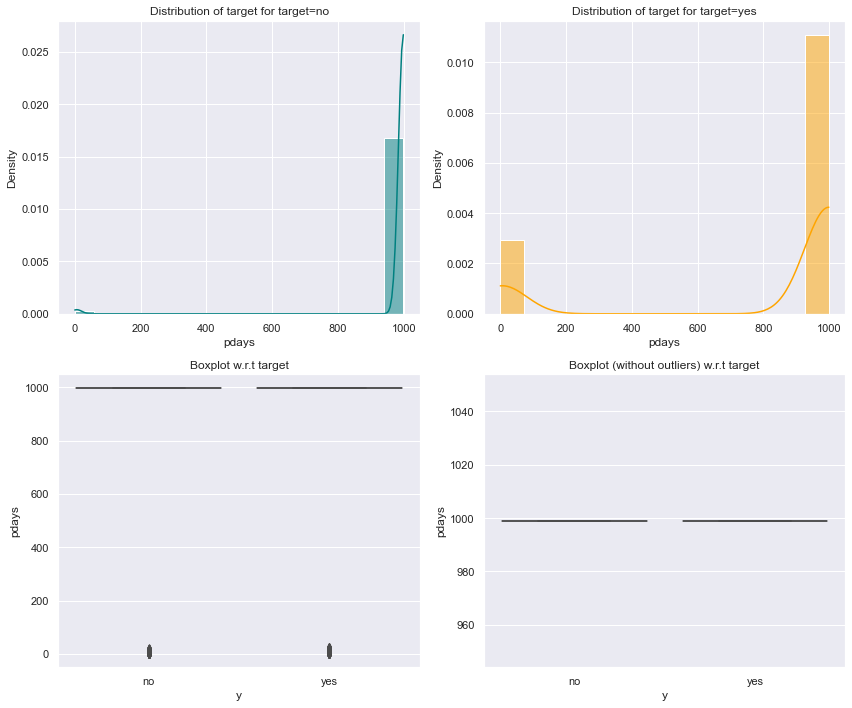

previous


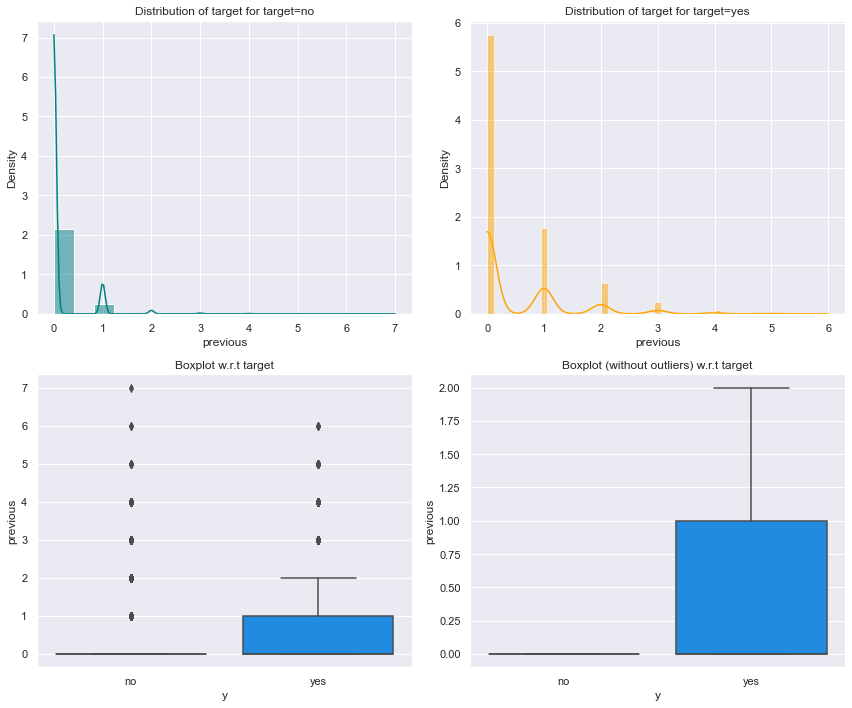

emp.var.rate


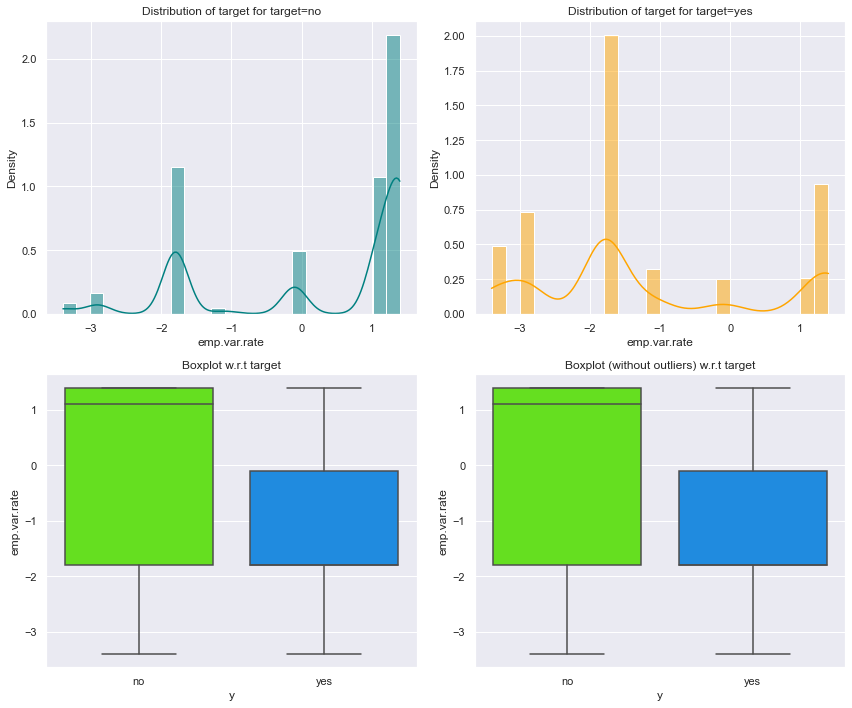

cons.price.idx


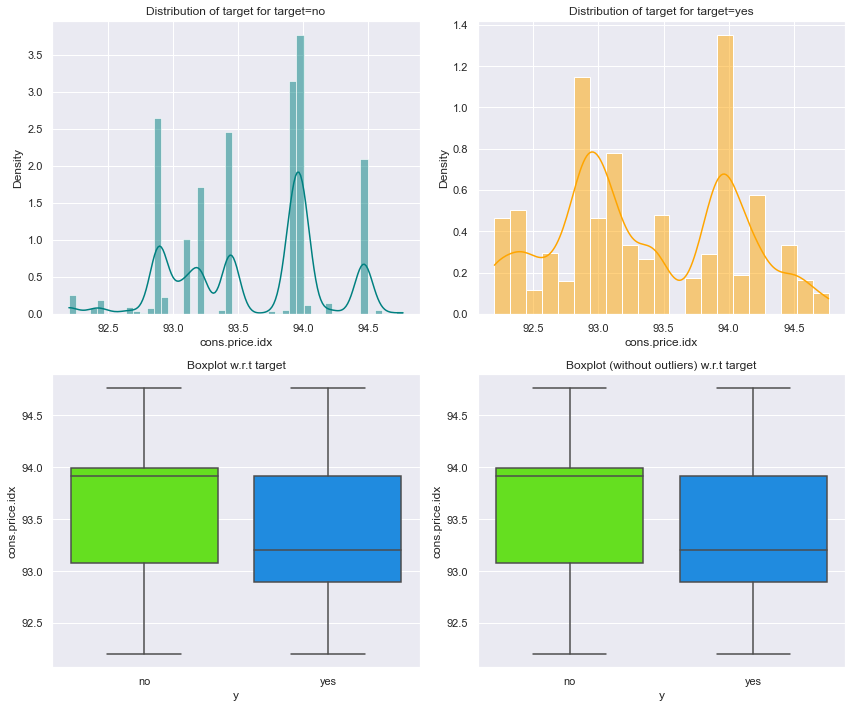

cons.conf.idx


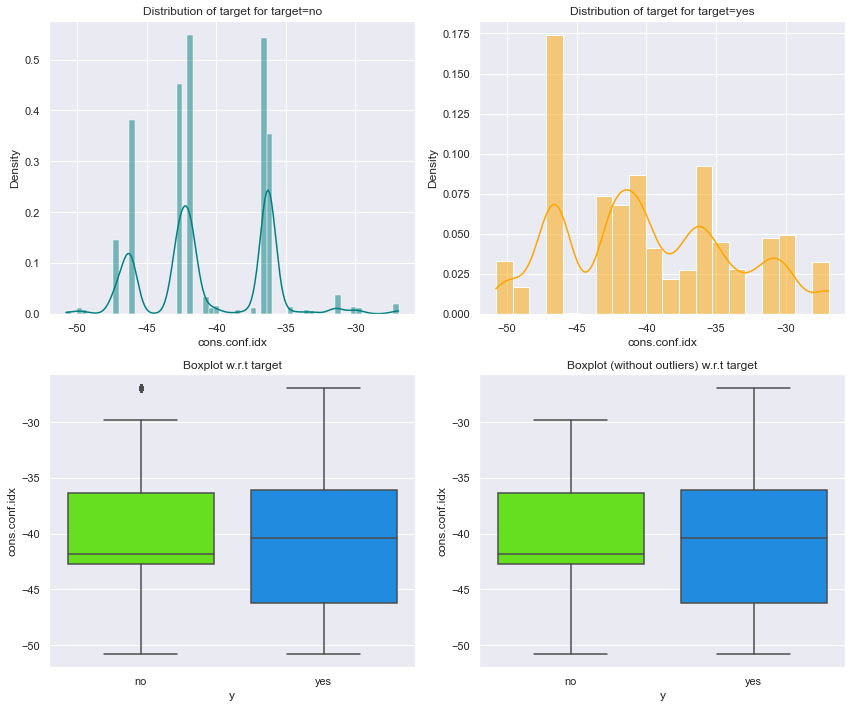

euribor3m


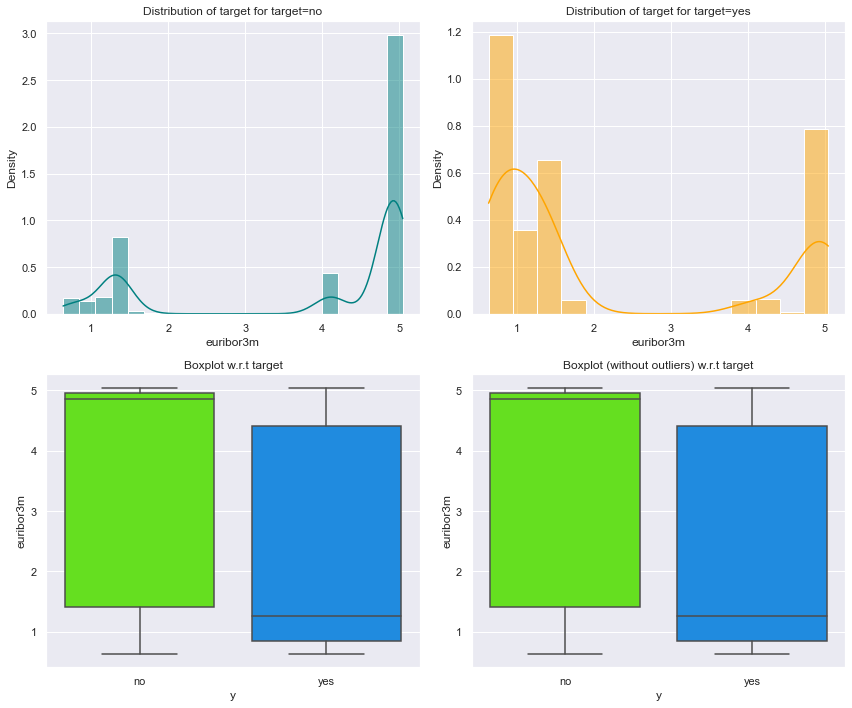

nr.employed


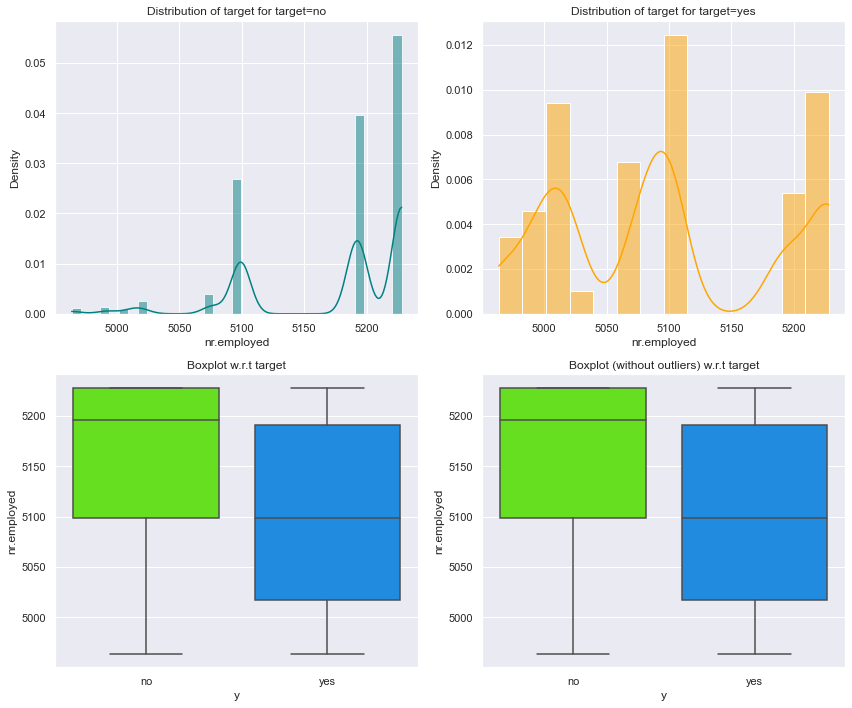

In [21]:
for col in col_num:
    print(col)
    distribution_plot_wrt_target(bank, col, "y")

* There doesn't seem to be a statistically significant difference in the age, number of contacts, days passed after previous contact, employment variation rate, consumer price and confidence indices, euribor 3 month rate, number of employees for clients who subscribed a term deposit vs those who did not
* The clients who subscribed to a term deposit had a significantly higher duration of contact vs those who did not

#### We can check how the categorical attributes are distributed for different values of the target variable

In [22]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart
    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 100)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

job
y                 no   yes    All
job                              
All            36548  4640  41188
admin.          9070  1352  10422
technician      6013   730   6743
blue-collar     8616   638   9254
retired         1286   434   1720
management      2596   328   2924
services        3646   323   3969
student          600   275    875
self-employed   1272   149   1421
unemployed       870   144   1014
entrepreneur    1332   124   1456
housemaid        954   106   1060
unknown          293    37    330
----------------------------------------------------------------------------------------------------


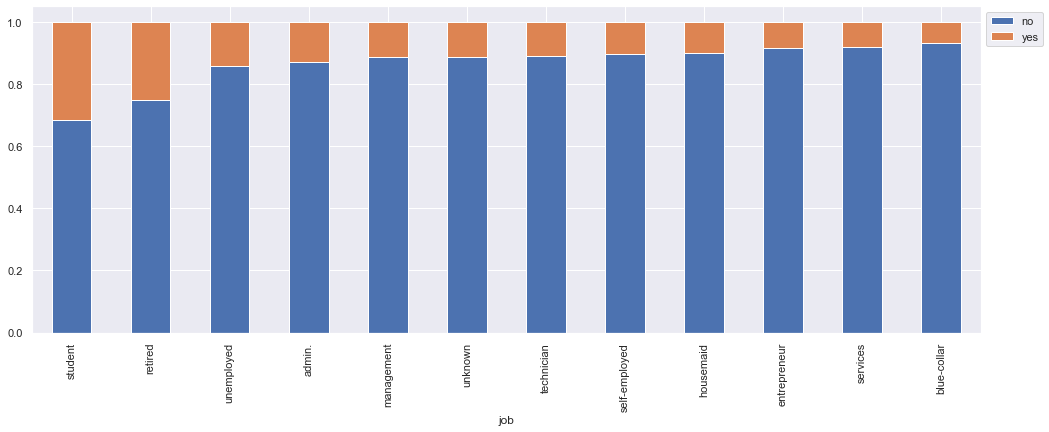

marital
y            no   yes    All
marital                     
All       36548  4640  41188
married   22396  2532  24928
single     9948  1620  11568
divorced   4136   476   4612
unknown      68    12     80
----------------------------------------------------------------------------------------------------


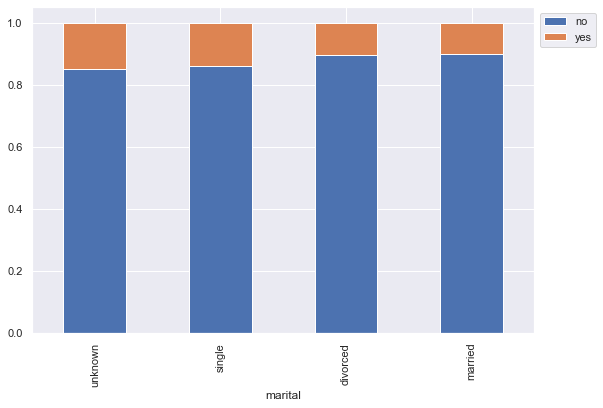

education
y                       no   yes    All
education                              
All                  36548  4640  41188
university.degree    10498  1670  12168
high.school           8484  1031   9515
professional.course   4648   595   5243
basic.9y              5572   473   6045
basic.4y              3748   428   4176
unknown               1480   251   1731
basic.6y              2104   188   2292
illiterate              14     4     18
----------------------------------------------------------------------------------------------------


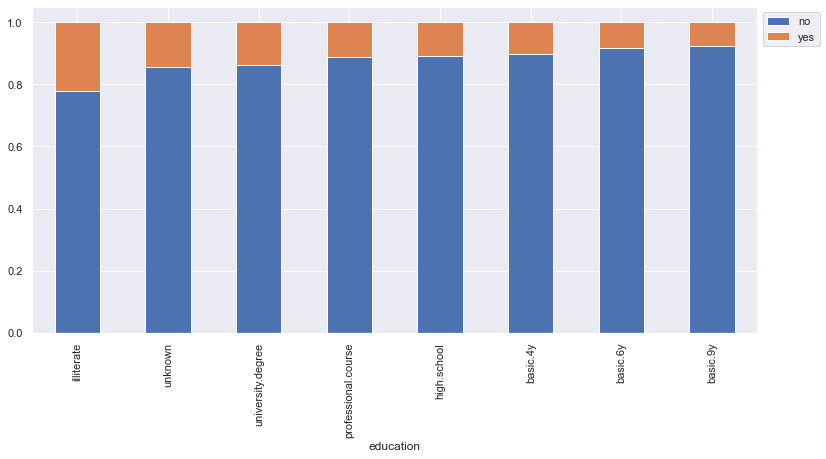

default
y           no   yes    All
default                    
All      36548  4640  41188
no       28391  4197  32588
unknown   8154   443   8597
yes          3     0      3
----------------------------------------------------------------------------------------------------


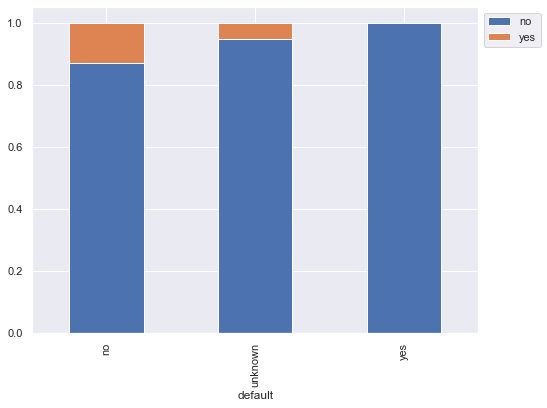

housing
y           no   yes    All
housing                    
All      36548  4640  41188
yes      19069  2507  21576
no       16596  2026  18622
unknown    883   107    990
----------------------------------------------------------------------------------------------------


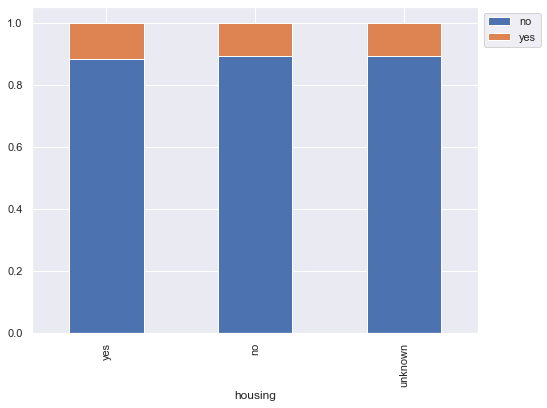

loan
y           no   yes    All
loan                       
All      36548  4640  41188
no       30100  3850  33950
yes       5565   683   6248
unknown    883   107    990
----------------------------------------------------------------------------------------------------


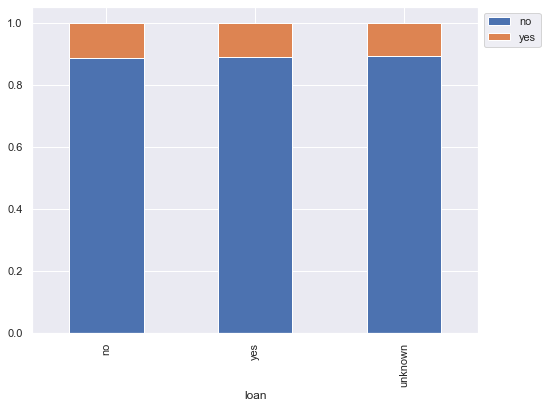

contact
y             no   yes    All
contact                      
All        36548  4640  41188
cellular   22291  3853  26144
telephone  14257   787  15044
----------------------------------------------------------------------------------------------------


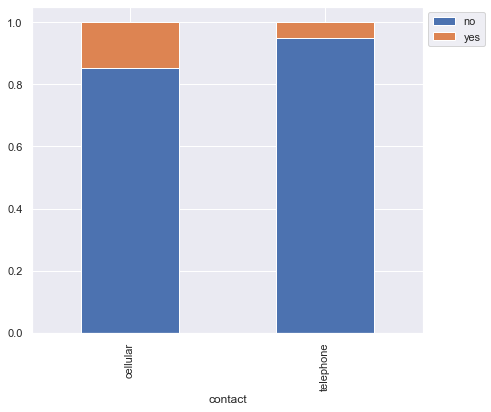

month
y         no   yes    All
month                    
All    36548  4640  41188
may    12883   886  13769
aug     5523   655   6178
jul     6525   649   7174
jun     4759   559   5318
apr     2093   539   2632
nov     3685   416   4101
oct      403   315    718
mar      270   276    546
sep      314   256    570
dec       93    89    182
----------------------------------------------------------------------------------------------------


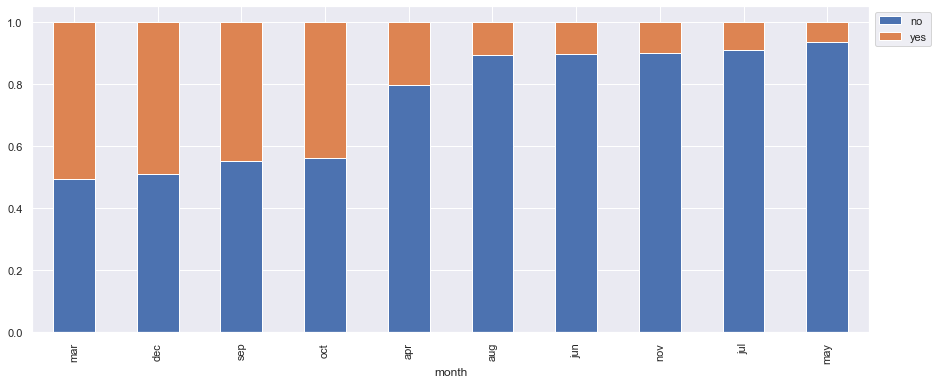

day_of_week
y               no   yes    All
day_of_week                    
All          36548  4640  41188
thu           7578  1045   8623
tue           7137   953   8090
wed           7185   949   8134
mon           7667   847   8514
fri           6981   846   7827
----------------------------------------------------------------------------------------------------


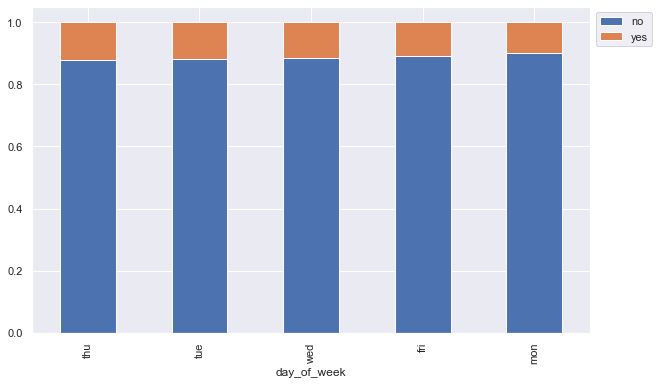

poutcome
y               no   yes    All
poutcome                       
All          36548  4640  41188
nonexistent  32422  3141  35563
success        479   894   1373
failure       3647   605   4252
----------------------------------------------------------------------------------------------------


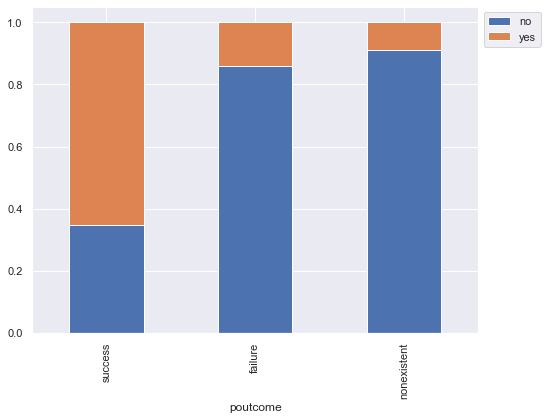

y
y       no   yes    All
y                      
yes      0  4640   4640
All  36548  4640  41188
no   36548     0  36548
----------------------------------------------------------------------------------------------------


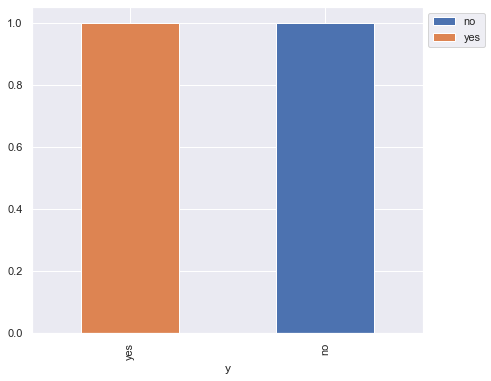

In [23]:
for col in col_obj:
    print(col)
    stacked_barplot(bank, col, "y")

* There is no specific insight on whether a client will subscribe to a term deposit for certain based on job, marital status, education, housing loan, personal loan, contact method, month of contact, day of week of contact, outcome of previous contact outcome 
* If a client has a prior credit default, they did not subscribe to a term deposit

### 6. Data Pre-processing

#### Outlier Treatment

We look at outlier drops on a case by case basis depending on their profile.
Dropping outliers in some colums may automatically remove outliers from other columns

`Age`

* We appear to have some discrete outliers over 70. It will be beneficial to check if there is any pattern such that these can be removed

In [24]:
bank[bank["age"]>=70]

age      job   marital            education  default housing loan  \
27713   70  retired  divorced             basic.4y       no     yes   no   
27757   76  retired   married    university.degree       no      no  yes   
27780   73  retired   married    university.degree       no     yes   no   
27800   88  retired  divorced             basic.4y       no     yes   no   
27802   88  retired  divorced             basic.4y       no      no   no   
...    ...      ...       ...                  ...      ...     ...  ...   
40986   84  retired  divorced             basic.4y  unknown     yes  yes   
40996   81  retired   married             basic.4y       no     yes   no   
41004   80  retired   married  professional.course       no     yes   no   
41183   73  retired   married  professional.course       no     yes   no   
41187   74  retired   married  professional.course       no     yes   no   

        contact month day_of_week  duration  campaign  pdays  previous  \
27713  cellular   mar         mon       187         3    999         0   
27757  cellular   mar         thu       167         9    999         0   
27780  cellular   mar         tue       179         1    999         1   
27800  cellular   mar         wed        48         1    999         0   
27802  cellular   mar         wed       266         2    999         0   
...         ...   ...         ...       ...       ...    ...       ...   
40986  cellular   oct         mon       138         4      3         1   
40996  cellular   oct         wed       621         1    999         2   
41004  cellular   oct         thu       411         1    999         1   
41183  cellular   nov         fri       334         1    999         0   
41187  cellular   nov         fri       239         3    999         1   

          poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
27713  nonexistent          -1.8          92.843          -50.0      1.811   
27757  nonexistent          -1.8          92.843          -50.0      1.757   
27780      failure          -1.8          92.843          -50.0      1.687   
27800  nonexistent          -1.8          92.843          -50.0      1.663   
27802  nonexistent          -1.8          92.843          -50.0      1.663   
...            ...           ...             ...            ...        ...   
40986      success          -1.1          94.601          -49.5      1.000   
40996      failure          -1.1          94.601          -49.5      1.016   
41004      failure          -1.1          94.601          -49.5      1.025   
41183  nonexistent          -1.1          94.767          -50.8      1.028   
41187      failure          -1.1          94.767          -50.8      1.028   

       nr.employed    y  
27713       5099.1  yes  
27757       5099.1   no  
27780       5099.1   no  
27800       5099.1   no  
27802       5099.1  yes  
...            ...  ...  
40986       4963.6   no  
40996       4963.6  yes  
41004       4963.6  yes  
41183       4963.6  yes  
41187       4963.6   no  

[469 rows x 21 columns]

* There doesn't appear to be any discrepancies in the values for any of the attributes. We will keep these outliers in the analysis

`Duration`

* We appear to have some outliers over a value of ~700 requiring a further check on if there are patterns

In [25]:
bank[bank["duration"]>=700]

age           job   marital            education  default housing loan  \
37      52    technician   married             basic.9y       no     yes   no   
57      45      services   married          high.school  unknown     yes   no   
61      51   blue-collar   married             basic.9y       no     yes   no   
75      41   blue-collar  divorced             basic.4y  unknown     yes   no   
83      49  entrepreneur   married    university.degree  unknown     yes   no   
...    ...           ...       ...                  ...      ...     ...  ...   
41123   36   blue-collar    single             basic.6y       no      no   no   
41142   43        admin.  divorced    university.degree       no     yes   no   
41147   25    technician    single  professional.course       no     yes   no   
41160   33        admin.   married    university.degree       no      no   no   
41164   54        admin.   married  professional.course       no      no   no   

         contact month day_of_week  duration  campaign  pdays  previous  \
37     telephone   may         mon      1666         1    999         0   
57     telephone   may         mon       787         1    999         0   
61     telephone   may         mon       812         1    999         0   
75     telephone   may         mon      1575         1    999         0   
83     telephone   may         mon      1042         1    999         0   
...          ...   ...         ...       ...       ...    ...       ...   
41123   cellular   nov         tue      1556         4    999         0   
41142   cellular   nov         fri       741         4    999         2   
41147   cellular   nov         fri       712         2     19         1   
41160   cellular   nov         tue       843         1    999         0   
41164   cellular   nov         tue      1868         2     10         1   

          poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
37     nonexistent           1.1          93.994          -36.4      4.857   
57     nonexistent           1.1          93.994          -36.4      4.857   
61     nonexistent           1.1          93.994          -36.4      4.857   
75     nonexistent           1.1          93.994          -36.4      4.857   
83     nonexistent           1.1          93.994          -36.4      4.857   
...            ...           ...             ...            ...        ...   
41123  nonexistent          -1.1          94.767          -50.8      1.046   
41142      failure          -1.1          94.767          -50.8      1.040   
41147      success          -1.1          94.767          -50.8      1.040   
41160  nonexistent          -1.1          94.767          -50.8      1.035   
41164      success          -1.1          94.767          -50.8      1.035   

       nr.employed    y  
37          5191.0   no  
57          5191.0   no  
61          5191.0   no  
75          5191.0  yes  
83          5191.0  yes  
...            ...  ...  
41123       4963.6  yes  
41142       4963.6  yes  
41147       4963.6  yes  
41160       4963.6  yes  
41164       4963.6  yes  

[2467 rows x 21 columns]

* Once again, there doesn't seem to be any pattern in the other attributes for a Duration of over 700. So we will keep these outliers

`Campaign`

* We appear to have some outliers over a value of ~7 requiring a further check on if there are patterns

In [26]:
bank[bank["campaign"]>=7]

age           job   marital            education  default housing loan  \
887     54        admin.   married    university.degree       no      no   no   
1043    41    technician    single    university.degree  unknown      no   no   
1094    40    technician   married  professional.course       no     yes   no   
1097    51   blue-collar   married             basic.4y  unknown     yes   no   
1230    48   blue-collar  divorced             basic.4y       no      no   no   
...    ...           ...       ...                  ...      ...     ...  ...   
40611   75       retired   married             basic.9y       no      no   no   
40631   88       retired   married             basic.4y       no     yes   no   
40698   29    technician    single  professional.course       no     yes   no   
40821   33    technician    single  professional.course       no     yes   no   
40993   50  entrepreneur  divorced    university.degree       no     yes   no   

         contact month day_of_week  duration  campaign  pdays  previous  \
887    telephone   may         wed       388         7    999         0   
1043   telephone   may         wed        79         8    999         0   
1094   telephone   may         wed       253         8    999         0   
1097   telephone   may         wed       244         7    999         0   
1230   telephone   may         thu       521         7    999         0   
...          ...   ...         ...       ...       ...    ...       ...   
40611  telephone   sep         fri       543         9    999         1   
40631   cellular   sep         mon       213         7    999         0   
40698   cellular   sep         mon       157         7      3         5   
40821   cellular   sep         fri       246         9    999         2   
40993  telephone   oct         tue       898         7     11         2   

          poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
887    nonexistent           1.1          93.994          -36.4      4.856   
1043   nonexistent           1.1          93.994          -36.4      4.856   
1094   nonexistent           1.1          93.994          -36.4      4.856   
1097   nonexistent           1.1          93.994          -36.4      4.856   
1230   nonexistent           1.1          93.994          -36.4      4.855   
...            ...           ...             ...            ...        ...   
40611      failure          -1.1          94.199          -37.5      0.883   
40631  nonexistent          -1.1          94.199          -37.5      0.882   
40698      success          -1.1          94.199          -37.5      0.879   
40821      failure          -1.1          94.199          -37.5      0.879   
40993      success          -1.1          94.601          -49.5      1.008   

       nr.employed    y  
887         5191.0   no  
1043        5191.0   no  
1094        5191.0   no  
1097        5191.0   no  
1230        5191.0   no  
...            ...  ...  
40611       4963.6   no  
40631       4963.6   no  
40698       4963.6   no  
40821       4963.6   no  
40993       4963.6  yes  

[2406 rows x 21 columns]

* No patterns emerge in any of the features for Campaign >= 7. We will keep these outliers in the analysis

`pdays`

* We appear to have some outliers over a value of <100 requiring a further check on if there are patterns

In [27]:
bank[bank["pdays"]<100]

age            job   marital            education  default housing  \
24108   37         admin.   married    university.degree       no     yes   
24264   48     management   married    university.degree       no     yes   
24279   42     technician   married  professional.course  unknown     yes   
24397   50   entrepreneur   married    university.degree  unknown     yes   
24482   36  self-employed    single    university.degree       no     yes   
...    ...            ...       ...                  ...      ...     ...   
41163   35     technician  divorced             basic.4y       no     yes   
41164   54         admin.   married  professional.course       no      no   
41174   62        retired   married    university.degree       no     yes   
41178   62        retired   married    university.degree       no      no   
41182   29     unemployed    single             basic.4y       no     yes   

      loan    contact month day_of_week  duration  campaign  pdays  previous  \
24108   no  telephone   nov         wed       119         1      6         1   
24264   no   cellular   nov         mon       112         1      4         1   
24279   no   cellular   nov         mon        94         1      4         1   
24397   no   cellular   nov         mon        77         1      3         1   
24482   no   cellular   nov         mon       200         2      4         1   
...    ...        ...   ...         ...       ...       ...    ...       ...   
41163   no   cellular   nov         tue       385         3      4         2   
41164   no   cellular   nov         tue      1868         2     10         1   
41174   no   cellular   nov         thu       208         1      1         6   
41178   no   cellular   nov         thu       483         2      6         3   
41182   no   cellular   nov         fri       112         1      9         1   

      poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
24108  success          -0.1          93.200          -42.0      4.286   
24264  success          -0.1          93.200          -42.0      4.191   
24279  success          -0.1          93.200          -42.0      4.191   
24397  success          -0.1          93.200          -42.0      4.191   
24482  success          -0.1          93.200          -42.0      4.191   
...        ...           ...             ...            ...        ...   
41163  success          -1.1          94.767          -50.8      1.035   
41164  success          -1.1          94.767          -50.8      1.035   
41174  success          -1.1          94.767          -50.8      1.031   
41178  success          -1.1          94.767          -50.8      1.031   
41182  success          -1.1          94.767          -50.8      1.028   

       nr.employed    y  
24108       5195.8   no  
24264       5195.8   no  
24279       5195.8   no  
24397       5195.8   no  
24482       5195.8   no  
...            ...  ...  
41163       4963.6  yes  
41164       4963.6  yes  
41174       4963.6  yes  
41178       4963.6  yes  
41182       4963.6   no  

[1515 rows x 21 columns]

* No specific trends in any of the features for pdays < 100. We will keep these outliers in the analysis

`previous`

* We appear to have some outliers over a value of 1 requiring a further check on if there are patterns

In [28]:
bank[bank["previous"]>=1]

age          job  marital            education default housing loan  \
24013   38  blue-collar   single              unknown      no     yes   no   
24019   40     services  married          high.school      no     yes   no   
24076   36       admin.  married    university.degree      no     yes   no   
24102   36       admin.  married          high.school      no     yes   no   
24108   37       admin.  married    university.degree      no     yes   no   
...    ...          ...      ...                  ...     ...     ...  ...   
41174   62      retired  married    university.degree      no     yes   no   
41175   34      student   single              unknown      no     yes   no   
41178   62      retired  married    university.degree      no      no   no   
41182   29   unemployed   single             basic.4y      no     yes   no   
41187   74      retired  married  professional.course      no     yes   no   

         contact month day_of_week  duration  campaign  pdays  previous  \
24013  telephone   oct         tue        39         1    999         1   
24019  telephone   oct         tue       144         1    999         1   
24076  telephone   nov         wed       449         1    999         1   
24102  telephone   nov         wed       114         1    999         1   
24108  telephone   nov         wed       119         1      6         1   
...          ...   ...         ...       ...       ...    ...       ...   
41174   cellular   nov         thu       208         1      1         6   
41175   cellular   nov         thu       180         1    999         2   
41178   cellular   nov         thu       483         2      6         3   
41182   cellular   nov         fri       112         1      9         1   
41187   cellular   nov         fri       239         3    999         1   

      poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
24013  failure          -0.1          93.798          -40.4      4.968   
24019  failure          -0.1          93.798          -40.4      4.968   
24076  failure          -0.1          93.200          -42.0      4.663   
24102  failure          -0.1          93.200          -42.0      4.286   
24108  success          -0.1          93.200          -42.0      4.286   
...        ...           ...             ...            ...        ...   
41174  success          -1.1          94.767          -50.8      1.031   
41175  failure          -1.1          94.767          -50.8      1.031   
41178  success          -1.1          94.767          -50.8      1.031   
41182  success          -1.1          94.767          -50.8      1.028   
41187  failure          -1.1          94.767          -50.8      1.028   

       nr.employed    y  
24013       5195.8   no  
24019       5195.8  yes  
24076       5195.8   no  
24102       5195.8  yes  
24108       5195.8   no  
...            ...  ...  
41174       4963.6  yes  
41175       4963.6   no  
41178       4963.6  yes  
41182       4963.6   no  
41187       4963.6   no  

[5625 rows x 21 columns]

* No patterns evident for other features when previous >= 1. We will keep these outliers in the analysis

#### Feature Engineering

* There are a few attributes with values of *unknown*. We attempt to identify if there are trends associated with these *unknown* values so that we may impute alternate values to them

In [29]:
bank[bank["loan"]=='unknown'].tail(200)

age            job   marital            education  default  housing  \
33294   43     technician   married    university.degree  unknown  unknown   
33351   38       services  divorced             basic.6y       no  unknown   
33378   41     management   married    university.degree       no  unknown   
33379   31     unemployed   married  professional.course       no  unknown   
33397   33    blue-collar    single             basic.4y       no  unknown   
33435   31    blue-collar    single             basic.9y       no  unknown   
33461   33  self-employed   married             basic.9y       no  unknown   
33466   22    blue-collar   married             basic.9y       no  unknown   
33573   31         admin.   married          high.school       no  unknown   
33575   59         admin.  divorced    university.degree  unknown  unknown   
33577   28    blue-collar   married          high.school       no  unknown   
33647   34       services  divorced             basic.6y  unknown  unknown   
33673   27    blue-collar   married          high.school       no  unknown   
33809   59         admin.  divorced          high.school       no  unknown   
33822   55    blue-collar   married             basic.4y  unknown  unknown   
33848   31  self-employed   married             basic.9y       no  unknown   
33904   32       services    single          high.school       no  unknown   
34107   30    blue-collar   married             basic.9y       no  unknown   
34131   27    blue-collar   married          high.school       no  unknown   
34147   45     unemployed  divorced             basic.6y       no  unknown   
34266   30       services    single          high.school       no  unknown   
34298   38    blue-collar   married             basic.4y       no  unknown   
34359   55       services    single             basic.9y       no  unknown   
34487   32       services    single    university.degree       no  unknown   
34523   32    blue-collar   married             basic.9y       no  unknown   
34546   33         admin.   married  professional.course       no  unknown   
34559   28         admin.   married          high.school       no  unknown   
34560   28        student    single          high.school       no  unknown   
34608   32     management   married          high.school       no  unknown   
34618   33    blue-collar   married             basic.9y  unknown  unknown   
34651   48       services  divorced             basic.9y       no  unknown   
34656   33         admin.  divorced    university.degree       no  unknown   
34698   52    blue-collar   unknown             basic.4y       no  unknown   
34704   51     technician   married  professional.course       no  unknown   
34826   59     management   married             basic.4y  unknown  unknown   
34848   24    blue-collar   married             basic.9y       no  unknown   
34858   24    blue-collar   married             basic.9y       no  unknown   
34969   35       services    single          high.school       no  unknown   
34970   42  self-employed   married  professional.course  unknown  unknown   
34984   37     unemployed   married    university.degree       no  unknown   
34989   29    blue-collar   married             basic.6y       no  unknown   
35005   43    blue-collar  divorced             basic.9y       no  unknown   
35026   33     technician  divorced          high.school       no  unknown   
35036   32   entrepreneur   married    university.degree       no  unknown   
35088   33       services   married          high.school       no  unknown   
35091   36     management  divorced    university.degree       no  unknown   
35110   23     technician    single  professional.course       no  unknown   
35137   36     technician  divorced  professional.course       no  unknown   
35231   45   entrepreneur  divorced    university.degree       no  unknown   
35283   29         admin.    single          high.school       no  unknown   
35367   39    blue-collar   m

* Housing loan and personal loan are correlated - so we will keep the *unknown* values in both field as it is given

In [30]:
bank[bank["default"]=='yes'].tail(200)

age         job  marital            education default housing loan  \
21580   48  technician  married  professional.course     yes      no   no   
21581   48  technician  married  professional.course     yes     yes   no   
24866   31  unemployed  married          high.school     yes      no   no   

        contact month day_of_week  duration  campaign  pdays  previous  \
21580  cellular   aug         tue        66         1    999         0   
21581  cellular   aug         tue       133         1    999         0   
24866  cellular   nov         tue       111         2    999         1   

          poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
21580  nonexistent           1.4          93.444          -36.1      4.963   
21581  nonexistent           1.4          93.444          -36.1      4.963   
24866      failure          -0.1          93.200          -42.0      4.153   

       nr.employed   y  
21580       5228.1  no  
21581       5228.1  no  
24866       5195.8  no

* we keep default listed as *unknown* as it is given since we have clients who subscribed to term deposit and clients who did not subscribe to term deposit even when they did not default on credit

In [31]:
bank[bank["education"]=='unknown'].tail(200)

age            job   marital education  default  housing     loan  \
38381   65        retired   married   unknown       no  unknown  unknown   
38443   24        student    single   unknown       no       no       no   
38450   24        student    single   unknown       no      yes       no   
38507   44     technician   married   unknown       no       no      yes   
38567   67        retired   married   unknown       no       no       no   
38697   81        unknown  divorced   unknown  unknown      yes       no   
38700   81        unknown  divorced   unknown  unknown      yes       no   
38701   30    blue-collar    single   unknown       no      yes       no   
38770   25         admin.   married   unknown       no       no       no   
38773   25         admin.   married   unknown       no       no       no   
38793   56     management  divorced   unknown       no      yes       no   
38810   80        retired  divorced   unknown       no      yes      yes   
38811   31     technician   married   unknown       no       no       no   
38815   63        retired   married   unknown       no       no       no   
38824   77        retired   married   unknown       no      yes       no   
38825   77        retired   married   unknown       no      yes       no   
38828   41     management   married   unknown       no       no      yes   
38834   19        student    single   unknown       no       no       no   
38865   25         admin.    single   unknown       no      yes       no   
38870   19        student    single   unknown       no      yes       no   
38871   25         admin.    single   unknown       no      yes       no   
38913   26        student    single   unknown       no      yes       no   
38914   24        student    single   unknown       no      yes       no   
38922   22        student    single   unknown       no       no       no   
38958   60         admin.   married   unknown  unknown      yes       no   
38986   30        student    single   unknown       no       no       no   
39008   30        student    single   unknown       no       no       no   
39014   65     management   married   unknown       no       no       no   
39018   65     management   married   unknown       no      yes       no   
39019   37     management   married   unknown       no       no       no   
39025   71        retired   married   unknown       no      yes      yes   
39040   63     technician   married   unknown       no      yes       no   
39050   56         admin.  divorced   unknown       no       no       no   
39056   68     technician   married   unknown       no       no       no   
39074   43     management   married   unknown       no      yes       no   
39087   28        student    single   unknown       no      yes       no   
39088   57         admin.   married   unknown       no      yes       no   
39108   46        unknown    single   unknown  unknown      yes       no   
39190   74        retired   married   unknown       no       no      yes   
39204   73        retired   married   unknown       no      yes       no   
39205   29         admin.    single   unknown       no      yes       no   
39262   62     technician   married   unknown       no       no       no   
39268   62     technician   married   unknown       no      yes       no   
39274   62     technician   married   unknown       no       no       no   
39278   62     technician   married   unknown       no       no       no   
39306   53     technician   married   unknown       no       no       no   
39307   26         admin.   married   unknown       no       no       no   
39311   47       services    single   unknown       no  unknown  unknown   
39321   27         admin.    single   unknown       no      yes       no   
39325   38        student    single   unknown       no       no      yes   
39326   38        student    single   unknown       no      yes       no   
39327   38        student    single   unknown       no 

* We keep education as *unknown* where it is listed as such since there are no patterns to correlate *unknown* values of education to specific values of other attributes

In [32]:
bank[bank["marital"]=='unknown'].tail(200)

age            job  marital            education  default  housing  \
40      58     management  unknown    university.degree       no      yes   
390     59        retired  unknown    university.degree  unknown       no   
413     57        retired  unknown             basic.4y       no       no   
1493    33       services  unknown          high.school       no      yes   
1608    32        unknown  unknown    university.degree       no       no   
3167    57        retired  unknown             basic.4y       no      yes   
3478    37     management  unknown          high.school       no       no   
4196    31         admin.  unknown          high.school       no       no   
4344    32        unknown  unknown    university.degree       no      yes   
4454    31    blue-collar  unknown              unknown  unknown       no   
6376    50  self-employed  unknown             basic.6y       no       no   
7145    32        unknown  unknown    university.degree       no      yes   
7368    37    blue-collar  unknown             basic.6y  unknown       no   
7573    33     technician  unknown  professional.course  unknown      yes   
7632    33     technician  unknown  professional.course  unknown       no   
9487    54    blue-collar  unknown             basic.6y  unknown       no   
9714    37    blue-collar  unknown             basic.6y  unknown       no   
10547   53       services  unknown              unknown       no      yes   
10962   58     management  unknown    university.degree       no       no   
11355   32        unknown  unknown    university.degree       no       no   
11679   33       services  unknown          high.school       no       no   
11789   58    blue-collar  unknown             basic.9y  unknown       no   
11883   52       services  unknown  professional.course       no      yes   
12028   55     technician  unknown              unknown  unknown       no   
14788   45        unknown  unknown              unknown       no      yes   
14789   45        unknown  unknown              unknown       no      yes   
15134   34         admin.  unknown    university.degree       no      yes   
15202   31  self-employed  unknown  professional.course       no       no   
15289   31  self-employed  unknown  professional.course       no       no   
16662   54      housemaid  unknown             basic.4y       no      yes   
17344   49        unknown  unknown              unknown  unknown      yes   
17421   55        unknown  unknown              unknown  unknown      yes   
17652   41        unknown  unknown              unknown       no      yes   
20603   29     technician  unknown          high.school       no      yes   
20604   29     technician  unknown          high.school       no      yes   
20761   29     technician  unknown          high.school       no      yes   
20777   36         admin.  unknown    university.degree       no       no   
20779   36         admin.  unknown    university.degree       no      yes   
22262   49         admin.  unknown    university.degree       no      yes   
22269   49         admin.  unknown    university.degree       no       no   
25778   50  self-employed  unknown             basic.6y       no       no   
26219   29         admin.  unknown  professional.course       no      yes   
26509   35  self-employed  unknown    university.degree       no       no   
26551   50     unemployed  unknown             basic.9y       no      yes   
26747   49     unemployed  unknown          high.school       no      yes   
26973   40   entrepreneur  unknown          high.school       no      yes   
26975   50     unemployed  unknown             basic.9y       no       no   
27835   50     unemployed  unknown    university.degree       no       no   
28034   33      housemaid  unknown    university.degree       no      yes   
29200   56    blue-collar  unknown             basic.4y       no       no   
29772   38         admin.  unknown    university.degree       no       no   
304

* We keep *unknown* as a separate category for marital status since there is no correlation of this value with any other attribute value

In [33]:
bank[bank["job"]=='unknown'].tail(200)

age      job   marital            education  default  housing     loan  \
10387   44  unknown    single             basic.9y  unknown      yes       no   
10420   47  unknown   married              unknown  unknown       no       no   
10621   45  unknown   married              unknown       no       no       no   
10777   45  unknown   married              unknown  unknown      yes      yes   
11049   49  unknown   married             basic.6y       no       no       no   
11192   45  unknown   married              unknown       no       no       no   
11203   49  unknown   married              unknown       no       no      yes   
11306   26  unknown    single          high.school  unknown       no       no   
11355   32  unknown   unknown    university.degree       no       no       no   
11477   47  unknown   married              unknown  unknown      yes       no   
11484   53  unknown   married              unknown       no       no       no   
11744   55  unknown   married             basic.4y  unknown       no       no   
11877   45  unknown   married              unknown       no       no       no   
11921   38  unknown   married              unknown  unknown      yes       no   
11977   33  unknown   married              unknown  unknown      yes       no   
12032   46  unknown   married             basic.4y  unknown      yes       no   
12592   50  unknown   married             basic.4y  unknown      yes       no   
12614   44  unknown    single             basic.9y  unknown       no       no   
13364   60  unknown   married             basic.4y  unknown      yes       no   
13691   32  unknown    single  professional.course       no      yes       no   
13730   32  unknown    single  professional.course       no       no       no   
13737   32  unknown    single  professional.course       no       no       no   
14105   56  unknown    single             basic.9y       no       no       no   
14118   56  unknown    single             basic.9y       no       no      yes   
14148   56  unknown    single             basic.9y       no       no      yes   
14687   56  unknown  divorced             basic.4y       no       no       no   
14788   45  unknown   unknown              unknown       no      yes      yes   
14789   45  unknown   unknown              unknown       no      yes       no   
15241   35  unknown    single          high.school  unknown      yes       no   
16304   44  unknown   married             basic.6y       no       no       no   
16475   48  unknown   married             basic.6y       no       no       no   
16567   49  unknown   married    university.degree       no      yes       no   
16606   55  unknown   married              unknown  unknown      yes       no   
16650   42  unknown   married    university.degree       no       no      yes   
16886   53  unknown    single              unknown       no      yes       no   
16922   55  unknown   married             basic.4y       no      yes       no   
16929   55  unknown   married             basic.4y       no       no      yes   
16938   59  unknown   married              unknown       no      yes       no   
17023   55  unknown   married             basic.4y       no      yes       no   
17249   36  unknown    single              unknown       no       no       no   
17325   42  unknown    single    university.degree  unknown      yes       no   
17330   42  unknown   married              unknown       no      yes       no   
17344   49  unknown   unknown              unknown  unknown      yes      yes   
17421   55  unknown   unknown              unknown  unknown      yes       no   
17441   50  unknown   married              unknown  unknown       no       no   
17452   50  unknown   married              unknown  unknown      yes       no   
17466   42  unknown   married              unknown       no      yes       no   
17553   48  unknown   married              unknown  unknown      yes       no   
17652   41  unknown   unknown         

* We also keep *unknown* job values as they are since no correlation of these values to any other attribute

### 7. Model Building

### Model evaluation criterion

### Model can make wrong predictions as:

1. Predicting a customer is not going to subscribe a term deposit but in reality the customer will - Loss of opportunity (FN)
2. Predicting a customer is going to subscribe a term deposit but in reality the customer will not - Loss of some resources  (FP)


### Which Loss is greater ? 

* Loss of opportunity will be the greater loss assumed in this case as the bank will be losing on interest opportunity. Loss of some resources for a false positive would take time, effort and money spent on marketing campaign spread across the customers predicted to subscribe a term deposit. Since the %of customers predicted to be term deposit subscribers is small, we assume that reources spent on false positives may be small

### How to reduce this loss i.e need to reduce False Negatives ?

* Bank would want to reduce false negatives, this can be done by maximizing the Recall. Greater the recall lesser the chances of false negatives. We also want to have a reasonable F1 score which considers both Recall and Precision

In [34]:
# defining a function to compute different metrics to check performance of a classification model 
def model_performance_classification_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )
    return df_perf

In [35]:
# defining a function to plot the confusion_matrix of a classification model
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Logistic Regression

In [36]:
# drop y from independent variables as it is the predicted variable
# drop emp.var.rate, euribor3m as they are correlated to other features
# drop duration since it is not known in advance of a call

X = bank.drop(["y", "emp.var.rate", "euribor3m", "duration"], axis=1)

In [37]:
# convert the feature "previous" from numeric to categorical since there are only discrete values of "previous"
X["previous"] = X.previous.astype("category")

In [38]:
# created a predicted value dataframe
Y = bank["y"]

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)
# Using map function
Y = Y.map({'yes': 1, 'no': 0})

# splitting in training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42
)

In [39]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 28831
Number of rows in test data = 12357


In [40]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0    0.887239
1    0.112761
Name: y, dtype: float64
Percentage of classes in test set:
0    0.887594
1    0.112406
Name: y, dtype: float64


In [41]:
# There are different solvers available in SKlearn logistic regression
model = LogisticRegression(random_state=1, max_iter=5000)
lg = model.fit(X_train, y_train)

In [42]:
log_odds = lg.coef_[0]
pd.DataFrame(log_odds, X_train.columns, columns=["coef"]).T

age  campaign     pdays  cons.price.idx  cons.conf.idx  \
coef -0.001295 -0.068179 -0.001642        0.525369       0.025651   

      nr.employed  job_blue-collar  job_entrepreneur  job_housemaid  \
coef    -0.009375        -0.075299         -0.027007      -0.070694   

      job_management  job_retired  job_self-employed  job_services  \
coef       -0.041698     0.172803          -0.034064      -0.08958   

      job_student  job_technician  job_unemployed  job_unknown  \
coef      0.14469        -0.04168        0.021491    -0.031331   

      marital_married  marital_single  marital_unknown  education_basic.6y  \
coef         0.109388        0.029127         0.007064            0.030149   

      education_basic.9y  education_high.school  education_illiterate  \
coef           -0.026348               0.032255              0.008765   

      education_professional.course  education_university.degree  \
coef                      -0.023045                     0.057481   

      education_unknown  default_unknown  default_yes  housing_unknown  \
coef           0.001344        -0.352542    -0.000725        -0.001919   

      housing_yes  loan_unknown  loan_yes  contact_telephone  month_aug  \
coef     -0.06507     -0.001919  0.031903          -0.949502  -0.078397   

      month_dec  month_jul  month_jun  month_mar  month_may  month_nov  \
coef   0.086748  -0.059542   0.124444   0.386055  -0.637212  -0.224673   

      month_oct  month_sep  day_of_week_mon  day_of_week_thu  day_of_week_tue  \
coef   0.104938  -0.097708        -0.236828         0.111443         0.072165   

      day_of_week_wed  previous_1  previous_2  previous_3  previous_4  \
coef         0.128137   -0.102404   -0.050619   -0.073423    -0.03138   

      previous_5  previous_6  previous_7  poutcome_nonexistent  \
coef   -0.006336   -0.003036   -0.004538              0.304281   

      poutcome_success  
coef          0.096991

### Coefficient interpretations

* Coefficients of consumer price index, consumer confidence index, retired from job, being a student or unemployed, some education levels, having a personal loan, some months in the year, some days in the week, and having a successful or non-existent outcome from prior contact are positive, an increase in these will lead to an increase in chances of a customer subscribing a term deposit
* Coefficients of age, campaign, number of employees, jobs other than retired or student or unemployed, some education levels, having a credit default, having a housing loan, contact through telephone, some months of year, some days of week, previous contacts are negative, an increase in these will lead to a decrease in chances of a customer getting a term deposit

###  Converting coefficients to odds

* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

**Odds from coefficients**

In [43]:
# converting coefficients to odds
odds = np.exp(lg.coef_[0])

# finding the percentage change
perc_change_odds = (np.exp(lg.coef_[0]) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train.columns).T

age  campaign     pdays  cons.price.idx  cons.conf.idx  \
Odds         0.998706  0.934094  0.998360        1.691082       1.025983   
Change_odd% -0.129378 -6.590650 -0.164041       69.108236       2.598329   

             nr.employed  job_blue-collar  job_entrepreneur  job_housemaid  \
Odds            0.990669         0.927466          0.973355       0.931747   
Change_odd%    -0.933137        -7.253370         -2.664526      -6.825309   

             job_management  job_retired  job_self-employed  job_services  \
Odds               0.959160     1.188632           0.966510      0.914316   
Change_odd%       -4.084019    18.863244          -3.349013     -8.568444   

             job_student  job_technician  job_unemployed  job_unknown  \
Odds            1.155681        0.959177        1.021724     0.969155   
Change_odd%    15.568144       -4.082322        2.172392    -3.084484   

             marital_married  marital_single  marital_unknown  \
Odds                1.115595        1.029556         1.007089   
Change_odd%        11.559509        2.955564         0.708862   

             education_basic.6y  education_basic.9y  education_high.school  \
Odds                   1.030608            0.973996               1.032781   
Change_odd%            3.060814           -2.600369               3.278094   

             education_illiterate  education_professional.course  \
Odds                     1.008803                       0.977219   
Change_odd%              0.880302                      -2.278125   

             education_university.degree  education_unknown  default_unknown  \
Odds                            1.059165           1.001345         0.702899   
Change_odd%                     5.916548           0.134457       -29.710106   

             default_yes  housing_unknown  housing_yes  loan_unknown  \
Odds            0.999275         0.998083     0.937002      0.998083   
Change_odd%    -0.072491        -0.191743    -6.299825     -0.191743   

             loan_yes  contact_telephone  month_aug  month_dec  month_jul  \
Odds         1.032418           0.386934   0.924597   1.090621   0.942196   
Change_odd%  3.241755         -61.306648  -7.540262   9.062132  -5.780372   

             month_jun  month_mar  month_may  month_nov  month_oct  month_sep  \
Odds          1.132519   1.471166   0.528765   0.798778   1.110642   0.906914   
Change_odd%  13.251882  47.116623 -47.123519 -20.122232  11.064193  -9.308598   

             day_of_week_mon  day_of_week_thu  day_of_week_tue  \
Odds                0.789127         1.117890         1.074833   
Change_odd%       -21.087307        11.788992         7.483255   

             day_of_week_wed  previous_1  previous_2  previous_3  previous_4  \
Odds                1.136709    0.902665    0.950641    0.929208    0.969107   
Change_odd%        13.670895   -9.733538   -4.935901   -7.079204   -3.089286   

             previous_5  previous_6  previous_7  poutcome_nonexistent  \
Odds           0.993684    0.996969    0.995473              1.355650   
Change_odd%   -0.631605   -0.303126   -0.452739             35.564952   

             poutcome_success  
Odds                 1.101850  
Change_odd%         10.185043

### Coefficient interpretations

* `cons.price.idx`: Holding all other features constant, a unit change in Consumer Price Index will increase the odds of a customer getting a term deposit by 1.691 times or a 69.1% increase in the odds. Interpretation can be done similarly for consumer confidence index, retired from job, being a student or unemployed, some education levels, having a personal loan, some months in the year, some days in the week, and having a successful or non-existent outcome from prior contact
* `campaign`: Holding all other features constant, a unit change in number of contacts performed on client during the campaign will increase the odds of customer subscribing to a term deposit by 0.934 times or a 6.59% decrease in the odds. Interpretation can be done similarly for age, number of employees, jobs other than retired or student or unemployed, some education levels, having a credit default, having a housing loan, contact through telephone, some months of year, some days of week, previous contacts

### 8. Model Performance Evaluation

#### Checking model performance on training set

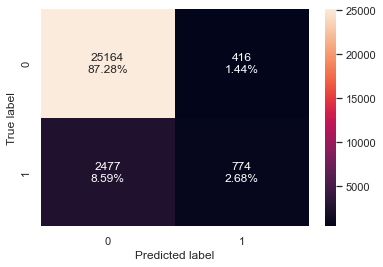

In [44]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_train, y_train)

In [45]:
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


Accuracy    Recall  Precision       F1
0  0.899657  0.238081    0.65042  0.34857

#### ROC-AUC

* ROC-AUC on training set

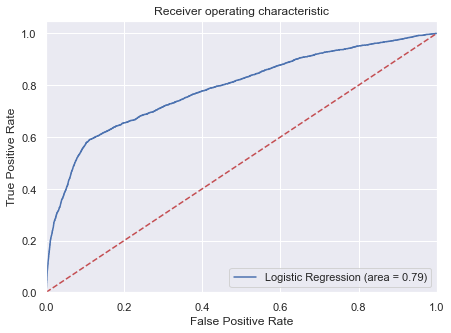

In [46]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict_proba(X_train)[:, 1])
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* The recall is quite low for the Logistic Regression algorithm

### Model Performance Improvement

* Let's see if the recall score can be improved further, by changing the model threshold using AUC-ROC Curve.

In [47]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.1329042661621937


#### Checking model performance on training set

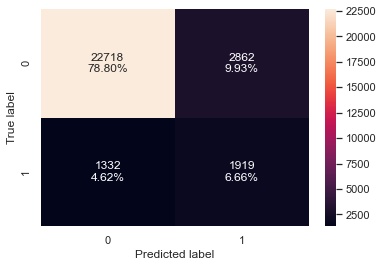

In [48]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)

In [49]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy   Recall  Precision        F1
0  0.854532  0.59028    0.40138  0.477839

#### Let's use Precision-Recall curve and see if we can find a better threshold


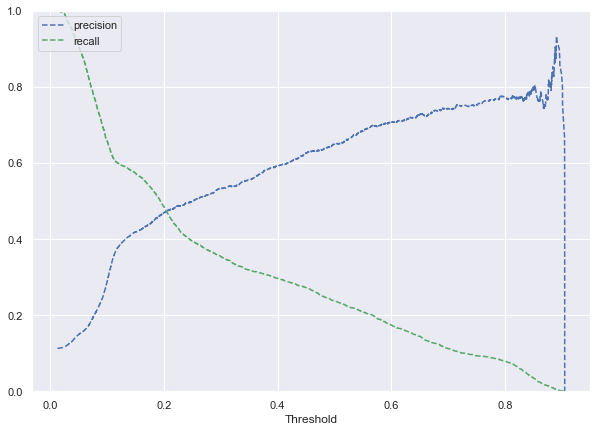

In [50]:
y_scores = lg.predict_proba(X_train)[:, 1]
prec, rec, tre = precision_recall_curve(y_train, y_scores,)

def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At threshold around 0.2 we will get equal precision and recall 

In [51]:
# Setting the threshold
optimal_threshold_curve = 0.2

#### Checking model performance on training set

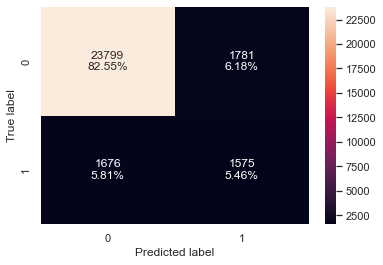

In [52]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)

In [53]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy    Recall  Precision        F1
0  0.880094  0.484466   0.469309  0.476767

* Recall has improved as compared to the initial model.
* Model with threshold as 0.133 was giving a better recall.

In [54]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.133 Threshold",
    "Logistic Regression-0.2 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression sklearn  Logistic Regression-0.133 Threshold  \
Accuracy                      0.899657                             0.854532   
Recall                        0.238081                             0.590280   
Precision                     0.650420                             0.401380   
F1                            0.348570                             0.477839   

           Logistic Regression-0.2 Threshold  
Accuracy                            0.880094  
Recall                              0.484466  
Precision                           0.469309  
F1                                  0.476767

#### Let's check the performance on the test set

**Using the model with default threshold**

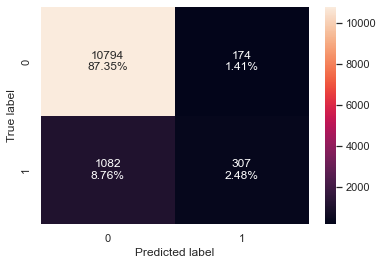

In [55]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_test, y_test)

In [56]:
log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test
)

print("Test set performance:")
log_reg_model_test_perf

Test set performance:


Accuracy    Recall  Precision        F1
0  0.898357  0.221022   0.638254  0.328342

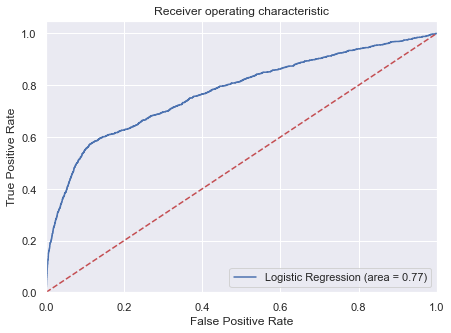

In [58]:
logit_roc_auc_test = roc_auc_score(y_test, lg.predict_proba(X_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(X_test)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**Using the model with threshold of 0.133**

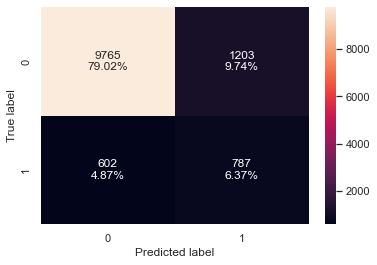

In [59]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)

In [60]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)
print("Test set performance:")
log_reg_model_test_perf_threshold_auc_roc

Test set performance:


Accuracy    Recall  Precision        F1
0  0.853929  0.566595   0.395477  0.465818

**Using the model with threshold 0.2**

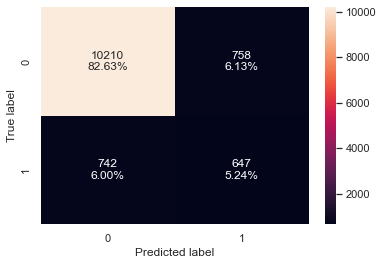

In [61]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)

In [62]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


Accuracy    Recall  Precision        F1
0  0.878611  0.465803   0.460498  0.463135

### Model performance comparison

In [63]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.133 Threshold",
    "Logistic Regression-0.2 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Logistic Regression sklearn  Logistic Regression-0.133 Threshold  \
Accuracy                      0.898357                             0.853929   
Recall                        0.221022                             0.566595   
Precision                     0.638254                             0.395477   
F1                            0.328342                             0.465818   

           Logistic Regression-0.2 Threshold  
Accuracy                            0.878611  
Recall                              0.465803  
Precision                           0.460498  
F1                                  0.463135

### Conclusion

* By changing the threshold of the logistic regression model we were able to see a significant improvement in the model performance
* The model achieved a recall of 0.567 on the training set with threshold set at 0.133

### 9. Alternate Model

* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. 
* Frequency of class A is ~10% and the frequency of class B is ~90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

* In this case, we can pass a dictionary {0:0.1,1:0.9} to the model to specify the weight of each class and the decision tree will give more weightage to class 1. This is based on the class distribution observed earlier in the Logistic Regression section

* class_weight is a hyperparameter for the decision tree classifier.

In [64]:
##  Function to calculate recall score
def get_recall_score(model, predictors, target):
    prediction = model.predict(predictors)
    return recall_score(target, prediction)

In [65]:
def confusion_matrix_sklearn(model, predictors, target):
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [66]:
XD = bank.drop(["y", "emp.var.rate", "euribor3m", "duration"], axis=1)
XD["previous"] = XD.previous.astype("category")

YD = bank["y"]

# creating dummy variables
XD = pd.get_dummies(XD, drop_first=True)
# Using map function
YD = YD.map({'yes': 1, 'no': 0})

# splitting in training and test set
XD_train, XD_test, yD_train, yD_test = train_test_split(
    XD, YD, test_size=0.3, random_state=42
)

In [67]:
model = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.1, 1: 0.90}, random_state=1
)

In [68]:
# change X train and y train
model.fit(XD_train, yD_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, random_state=1)

#### Checking model performance on training set

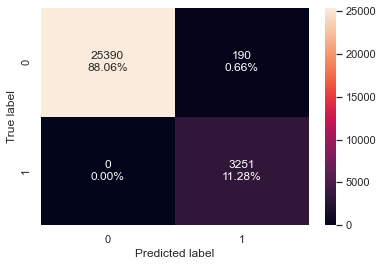

In [69]:
# creating confusion matrix
confusion_matrix_sklearn(
    model, XD_train, yD_train
)

In [70]:
decision_tree_perf_train = get_recall_score(model, XD_train, yD_train)

print("Recall Score:", decision_tree_perf_train)

Recall Score: 1.0


* Model is able to perform very well with a Recall os 1.0 indicating there may be some overfitting by the model

#### Checking model performance on test set

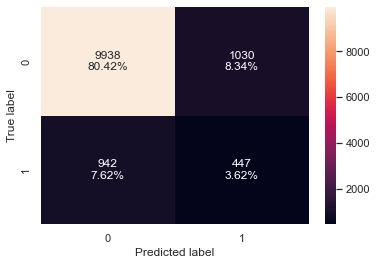

In [71]:
confusion_matrix_sklearn(model, XD_test, yD_test)

In [72]:
decision_tree_perf_test = get_recall_score(model, XD_test, yD_test)
print("Recall Score:", decision_tree_perf_test)

Recall Score: 0.32181425485961124


* There is disparity in performance of model on training set and test set, which suggests that the model is overfiiting.

#### Visualize the Decision Tree

In [73]:
## creating a list of column names
feature_names = XD_train.columns.to_list()

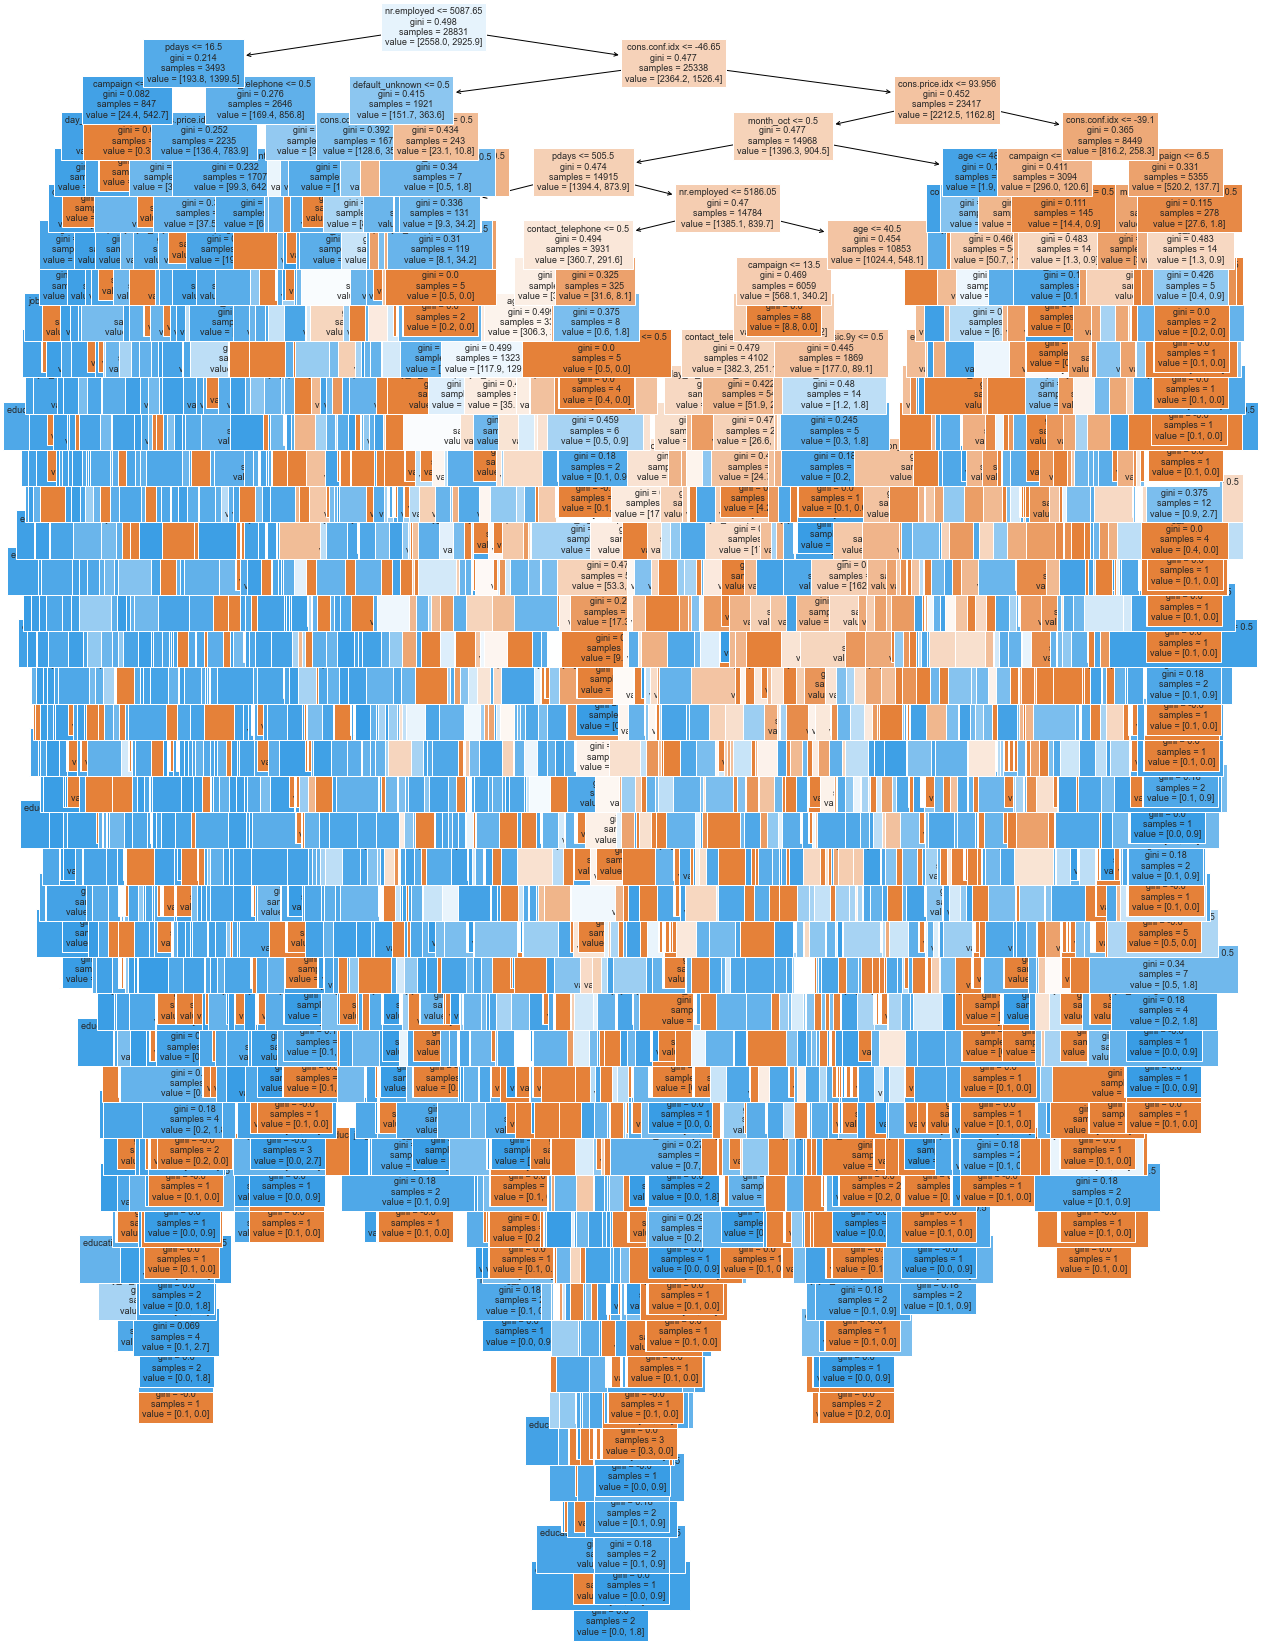

In [74]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [75]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- nr.employed <= 5087.65
|   |--- pdays <= 16.50
|   |   |--- campaign <= 7.50
|   |   |   |--- day_of_week_mon <= 0.50
|   |   |   |   |--- previous_7 <= 0.50
|   |   |   |   |   |--- cons.price.idx <= 92.29
|   |   |   |   |   |   |--- age <= 21.50
|   |   |   |   |   |   |   |--- weights: [0.30, 0.00] class: 0
|   |   |   |   |   |   |--- age >  21.50
|   |   |   |   |   |   |   |--- campaign <= 3.50
|   |   |   |   |   |   |   |   |--- job_self-employed <= 0.50
|   |   |   |   |   |   |   |   |   |--- poutcome_success <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- age <= 25.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.20, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |   |--- age >  25.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- poutcome_success >  0.50
|   |   |   |   |   |   |   |   |   |   |--- day_of_week_wed <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- trun

In [76]:
# importance of features in the tree building ( The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=XD_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                    Imp
nr.employed                    0.204994
age                            0.178527
campaign                       0.087964
cons.conf.idx                  0.053350
housing_yes                    0.040535
loan_yes                       0.026343
marital_married                0.022747
education_high.school          0.021705
day_of_week_tue                0.021600
default_unknown                0.020768
day_of_week_mon                0.019885
day_of_week_thu                0.019502
cons.price.idx                 0.019192
day_of_week_wed                0.019037
education_university.degree    0.017871
job_blue-collar                0.017047
marital_single                 0.016425
education_basic.9y             0.016308
job_technician                 0.016163
job_management                 0.014061
job_services                   0.013888
pdays                          0.012737
education_professional.course  0.012521
job_self-employed              0.009802


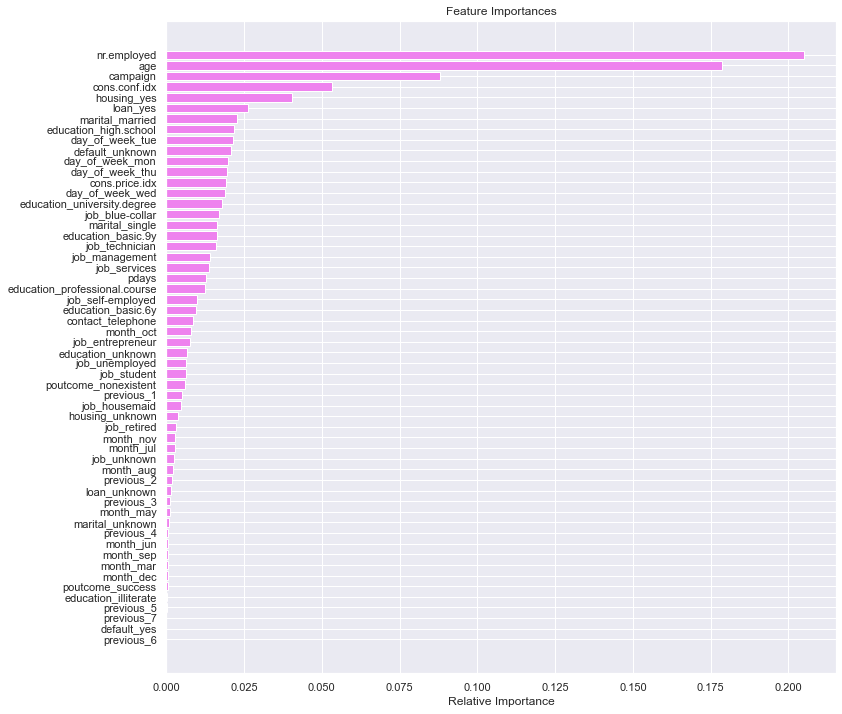

In [77]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* According to the decision tree model, number of employees, age and number of contacts during the campaign followed by consumer confidence index and if the client has housing and personal loans are the most important variables for predicting the subscription of term deposit

### Reducing over fitting

#### Using GridSearch for Hyperparameter tuning of our tree model

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [78]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.1, 1: 0.9})

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 10, 15, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
#    "min_impurity_decrease": [0.000005, 0.00001, 0.00005],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(XD_train, yD_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(XD_train, yD_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, max_depth=5,
                       random_state=1, splitter='random')

#### Checking performance on training set

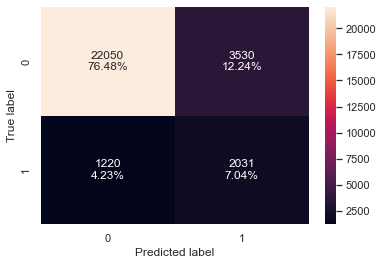

In [79]:
confusion_matrix_sklearn(estimator, XD_train, yD_train)

In [80]:
decision_tree_tune_perf_train = get_recall_score(estimator, XD_train, yD_train)
print("Recall Score:", decision_tree_tune_perf_train)

Recall Score: 0.6247308520455245


#### Checking performance on test set


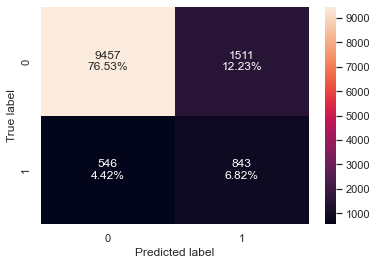

In [81]:
confusion_matrix_sklearn(estimator, XD_test, yD_test)

In [82]:
decision_tree_tune_perf_test = get_recall_score(estimator, XD_test, yD_test)
print("Recall Score:", decision_tree_tune_perf_test)

Recall Score: 0.6069114470842333


* The model is giving a generalized result now.

#### Visualizing the Decision Tree

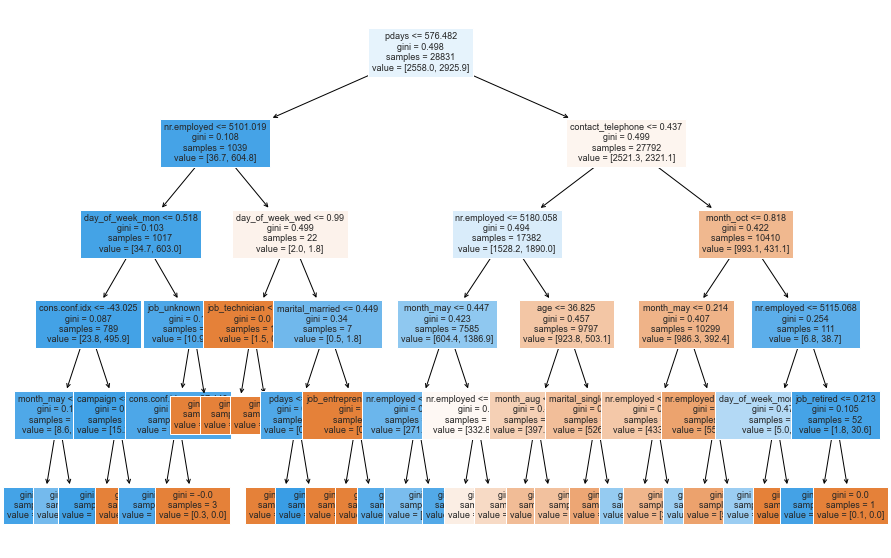

In [83]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [84]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- pdays <= 576.48
|   |--- nr.employed <= 5101.02
|   |   |--- day_of_week_mon <= 0.52
|   |   |   |--- cons.conf.idx <= -43.02
|   |   |   |   |--- month_may <= 0.96
|   |   |   |   |   |--- weights: [3.50, 60.30] class: 1
|   |   |   |   |--- month_may >  0.96
|   |   |   |   |   |--- weights: [5.10, 17.10] class: 1
|   |   |   |--- cons.conf.idx >  -43.02
|   |   |   |   |--- campaign <= 12.72
|   |   |   |   |   |--- weights: [15.10, 418.50] class: 1
|   |   |   |   |--- campaign >  12.72
|   |   |   |   |   |--- weights: [0.10, 0.00] class: 0
|   |   |--- day_of_week_mon >  0.52
|   |   |   |--- job_unknown <= 0.27
|   |   |   |   |--- cons.conf.idx <= -27.15
|   |   |   |   |   |--- weights: [10.30, 107.10] class: 1
|   |   |   |   |--- cons.conf.idx >  -27.15
|   |   |   |   |   |--- weights: [0.30, 0.00] class: 0
|   |   |   |--- job_unknown >  0.27
|   |   |   |   |--- weights: [0.30, 0.00] class: 0
|   |--- nr.employed >  5101.02
|   |   |--- day_of_week_wed <= 0.99
|   | 

In [85]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=XD_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                        Imp
nr.employed                    3.295945e-01
pdays                          3.199317e-01
contact_telephone              1.652697e-01
month_may                      1.331966e-01
month_oct                      3.703909e-02
month_aug                      3.270297e-03
age                            3.193973e-03
marital_single                 2.276167e-03
day_of_week_mon                1.634511e-03
day_of_week_wed                1.459971e-03
cons.conf.idx                  1.448813e-03
job_unknown                    6.505206e-04
marital_married                5.547889e-04
campaign                       2.445297e-04
job_retired                    2.349171e-04
job_technician                 1.093102e-18
job_entrepreneur               9.182060e-19
previous_7                     0.000000e+00
previous_1                     0.000000e+00
previous_2                     0.000000e+00
previous_6                     0.000000e+00
day_of_week_thu                0

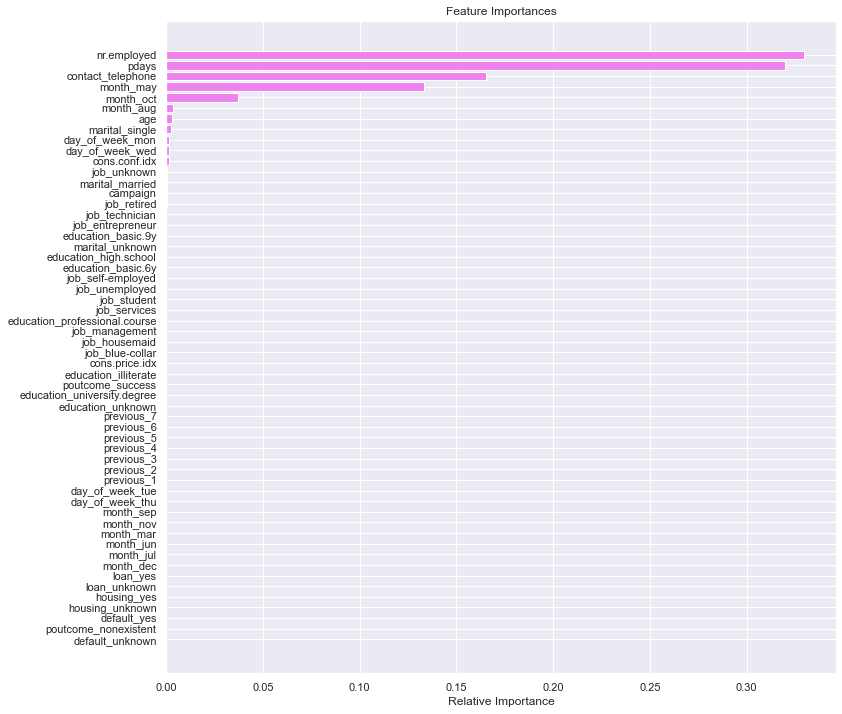

In [86]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* In tuned decision tree, number of employees, number of days that passed by after the client was last contacted from a previous campaign, contact via telephone, and contact in the month of May are the most important features

### 10. Actionable Insights & Recommendations

- We have been able to build a predictive models that can be used to predict whether a customer is likely to subscribe to a term deposit or not

#### Logistic Regression (Best Model):

- Training Recall: 0.590, Precision: 0.401, F1 score: 0.478
- Test Recall: 0.567, Precision: 0.395, F1 score: 0.466

* Coefficients of consumer price index, consumer confidence index, retired from job, being a student or unemployed, some education levels, having a personal loan, some months in the year, some days in the week, and having a successful or non-existent outcome from prior contact are positive, an increase in these will lead to an increase in chances of a customer subscribing a term deposit
* Coefficients of age, campaign, number of employees, jobs other than retired or student or unemployed, some education levels, having a credit default, having a housing loan, contact through telephone, some months of year, some days of week, previous contacts are negative, an increase in these will lead to a decrease in chances of a customer getting a term deposit


#### Decision Tree (Best Model):

- Training Recall: 0.625, Test Recall: 0.607 

* According to the best (most generalized) decision tree model - 
In tuned decision tree number of employees, number of days that passed by after the client was last contacted from a previous campaign, contact via telephone, and contact in the month of May are the most important features

### Recommendations for bank

- Based on Recall scores, we should consider using the Decision Tree approach which has more interpretability vs Logistic Regression approach
    
- Based on Decision Tree logic and Logistic Regression results, bank should target: 
    - customers when number of employees is low
    - reducing the number of days from the prior campaign contact
    - increasing contact in month of Oct
  Bank should avoid:
    - contact by telephone
    - contact in month of May